In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#Importing datasets
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

C:\Users\micha\AppData\Local\Temp\ipykernel_6132\785804565.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: e

In [3]:
#visualizing dataset
books

ISBN                                          bookTitle  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                  bookAuthor yearOfPublication  \
0         Mark P. O. Morford              2002   
1       Richard Bruce Wright              2001   
2               Carlo D'Este              1991   
3           Gina Bari Kolata              1999   
4            E. J. W. Barber              1999   
...                      ...               ...   
271355        Paula Danziger              1988   
271356            Teri Sloat              1991   
271357      Christine Wicker              2004   
271358                 Plato              1996   
271359   Christopher  Biffle              2000   

                                               publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                                imageUrlS  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                                imageUrlM  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                                imageUrlL  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.amazon.com/images/P/0393045

In [4]:
#Visualizing Dataset
users

userID                            Location   Age
0            1                  nyc, new york, usa   NaN
1            2           stockton, california, usa  18.0
2            3     moscow, yukon territory, russia   NaN
3            4           porto, v.n.gaia, portugal  17.0
4            5  farnborough, hants, united kingdom   NaN
...        ...                                 ...   ...
278853  278854               portland, oregon, usa   NaN
278854  278855  tacoma, washington, united kingdom  50.0
278855  278856           brampton, ontario, canada   NaN
278856  278857           knoxville, tennessee, usa   NaN
278857  278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [5]:
#Visualizing
ratings

userID         ISBN  bookRating
0        276725   034545104X           0
1        276726   0155061224           5
2        276727   0446520802           0
3        276729   052165615X           3
4        276729   0521795028           6
...         ...          ...         ...
1149775  276704   1563526298           9
1149776  276706   0679447156           0
1149777  276709   0515107662          10
1149778  276721   0590442449          10
1149779  276723  05162443314           8

[1149780 rows x 3 columns]

In [6]:
#Checking number of reviews of each book
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

bookRating
ISBN                  
0971880107        2502
0316666343        1295
0385504209         883
0060928336         732
0312195516         723

In [7]:
#Checking book withmore reviews
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

ISBN                                        bookTitle     bookAuthor  \
0  0971880107                                      Wild Animus   Rich Shapero   
1  0316666343                        The Lovely Bones: A Novel   Alice Sebold   
2  0385504209                                The Da Vinci Code      Dan Brown   
3  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells   
4  0312195516              The Red Tent (Bestselling Backlist)  Anita Diamant   

  yearOfPublication      publisher  \
0              2004        Too Far   
1              2002  Little, Brown   
2              2003      Doubleday   
3              1997      Perennial   
4              1998    Picador USA   

                                           imageUrlS  \
0  http://images.amazon.com/images/P/0971880107.0...   
1  http://images.amazon.com/images/P/0316666343.0...   
2  http://images.amazon.com/images/P/0385504209.0...   
3  http://images.amazon.com/images/P/0060928336.0...   
4  http://images.amazon.com/images/P/0312195516.0...   

                                           imageUrlM  \
0  http://images.amazon.com/images/P/0971880107.0...   
1  http://images.amazon.com/images/P/0316666343.0...   
2  http://images.amazon.com/images/P/0385504209.0...   
3  http://images.amazon.com/images/P/0060928336.0...   
4  http://images.amazon.com/images/P/0312195516.0...   

                                           imageUrlL  
0  http://images.amazon.com/images/P/0971880107.0...  
1  http://images.amazon.com/images/P/0316666343.0...  
2  http://images.amazon.com/images/P/0385504209.0...  
3  http://images.amazon.com/images/P/0060928336.0...  
4  http://images.amazon.com/images/P/0312195516.0...

In [8]:
#checking nunber of reviews
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

bookRating  ratingCount
ISBN                               
0971880107    1.019584         2502
0316666343    4.468726         1295
0385504209    4.652322          883
0060928336    3.448087          732
0312195516    4.334716          723

In [9]:
#Filtring dataset with at least 100 reviews per book and users that review at least 200 times
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [10]:
#Merging datasets 
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle         bookAuthor  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
1  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
2  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
3  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
4  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   

  yearOfPublication                  publisher  
0              1994  John Wiley &amp; Sons Inc  
1              1994  John Wiley &amp; Sons Inc  
2              1994  John Wiley &amp; Sons Inc  
3              1994  John Wiley &amp; Sons Inc  
4              1994  John Wiley &amp; Sons Inc

In [11]:
combine_book_rating.shape

(488742, 7)

In [12]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1

In [13]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

userID        ISBN  bookRating  \
0  277427  002542730X          10   
1    3363  002542730X           0   
2   11676  002542730X           6   
3   12538  002542730X          10   
4   13552  002542730X           0   

                                           bookTitle         bookAuthor  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
1  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
2  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
3  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   
4  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner   

  yearOfPublication                  publisher  totalRatingCount  
0              1994  John Wiley &amp; Sons Inc                82  
1              1994  John Wiley &amp; Sons Inc                82  
2              1994  John Wiley &amp; Sons Inc                82  
3              1994  John Wiley &amp; Sons Inc                82  
4              1994  John Wiley &amp; Sons Inc                82

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [15]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

In [16]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [17]:
# Understanding why year is object
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

ISBN                                          bookTitle  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       bookAuthor  yearOfPublication  \
209538       2000  DK Publishing Inc   
221678       2000  DK Publishing Inc   

                                                publisher  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                                imageUrlS  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                                imageUrlM imageUrlL  
209538  http://images.amazon.com/images/P/078946697X.0...       NaN  
221678  http://images.amazon.com/images/P/0789466953.0...       NaN

In [18]:
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"

In [19]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

ISBN                                          bookTitle  \
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       bookAuthor  yearOfPublication  \
221678       2000  DK Publishing Inc   

                                                publisher  \
221678  http://images.amazon.com/images/P/0789466953.0...   

                                                imageUrlS  \
221678  http://images.amazon.com/images/P/0789466953.0...   

                                                imageUrlM imageUrlL  
221678  http://images.amazon.com/images/P/0789466953.0...       NaN

In [20]:
books.loc[books.ISBN == '0789466953', 'yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953', 'bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953', 'publisher'] = "DK Publishing Inc"

In [21]:
books.loc[books.yearOfPublication == 'Gallimard']

ISBN                                          bookTitle  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

       bookAuthor yearOfPublication  \
220731       2003         Gallimard   

                                                publisher  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                                imageUrlS  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                                imageUrlM imageUrlL  
220731  http://images.amazon.com/images/P/2070426769.0...       NaN

In [22]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','publisher'] = 'Gallimard'

In [23]:
books.loc[books.yearOfPublication == 'Gallimard']

Empty DataFrame
Columns: [ISBN, bookTitle, bookAuthor, yearOfPublication, publisher, imageUrlS, imageUrlM, imageUrlL]
Index: []

In [24]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication)

In [25]:
sorted(books['yearOfPublication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [26]:
books = books.loc[books.yearOfPublication != 0,:]


In [27]:
books = books.loc[books.yearOfPublication != 1376,:]
books = books.loc[books.yearOfPublication != 1378,:]
books = books.loc[books.yearOfPublication != 1806,:]
books = books.loc[books.yearOfPublication != 2024,:]
books = books.loc[books.yearOfPublication != 2026,:]
books = books.loc[books.yearOfPublication != 2030,:]
books = books.loc[books.yearOfPublication != 2036,:]
books = books.loc[books.yearOfPublication != 2037,:]
books = books.loc[books.yearOfPublication != 2038,:]
books = books.loc[books.yearOfPublication != 2050,:]

In [28]:
books.shape

(266726, 8)

In [29]:
sorted(books['yearOfPublication'].unique())

[1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021]

In [30]:
# Joing datasets
rating_book = pd.merge(ratings, books, on='ISBN')

In [31]:
rating_book

userID        ISBN  bookRating  \
0       277427  002542730X          10   
1         3363  002542730X           0   
2        11676  002542730X           6   
3        12538  002542730X          10   
4        13552  002542730X           0   
...        ...         ...         ...   
483904  275970  1892145022           0   
483905  275970  1931868123           0   
483906  275970  3411086211          10   
483907  275970  3829021860           0   
483908  275970  4770019572           0   

                                                bookTitle  \
0       Politically Correct Bedtime Stories: Modern Ta...   
1       Politically Correct Bedtime Stories: Modern Ta...   
2       Politically Correct Bedtime Stories: Modern Ta...   
3       Politically Correct Bedtime Stories: Modern Ta...   
4       Politically Correct Bedtime Stories: Modern Ta...   
...                                                   ...   
483904                                   Here Is New York   
483905  There's a Porcupine in My Outhouse: Misadventu...   
483906                                         Die Biene.   
483907                                     The Penis Book   
483908                                            Musashi   

                           bookAuthor  yearOfPublication  \
0                   James Finn Garner               1994   
1                   James Finn Garner               1994   
2                   James Finn Garner               1994   
3                   James Finn Garner               1994   
4                   James Finn Garner               1994   
...                               ...                ...   
483904                    E. B. White               1999   
483905                   Mike Tougias               2002   
483906  Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt               1993   
483907                   Joseph Cohen               1999   
483908                 Eiji Yoshikawa               1995   

                                   publisher  \
0                  John Wiley &amp; Sons Inc   
1                  John Wiley &amp; Sons Inc   
2                  John Wiley &amp; Sons Inc   
3                  John Wiley &amp; Sons Inc   
4                  John Wiley &amp; Sons Inc   
...                                      ...   
483904                       Little Bookroom   
483905                    Capital Books (VA)   
483906  Bibliographisches Institut, Mannheim   
483907                              Konemann   
483908          Kodansha International (JPN)   

                                                imageUrlS  \
0       http://images.amazon.com/images/P/002542730X.0...   
1       http://images.amazon.com/images/P/002542730X.0...   
2       http://images.amazon.com/images/P/002542730X.0...   
3       http://images.amazon.com/images/P/002542730X.0...   
4       http://images.amazon.com/images/P/002542730X.0...   
...                                                   ...   
483904  http://images.amazon.com/images/P/1892145022.0...   
483905  http://images.amazon.com/images/P/1931868123.0...   
483906  http://images.amazon.com/images/P/3411086211.0...   
483907  http://images.amazon.com/images/P/3829021860.0...   
483908  http://images.amazon.com/images/P/4770019572.0...   

                                                imageUrlM  \
0       http://images.amazon.com/images/P/002542730X.0...   
1       http://images.amazon.com/images/P/002542730X.0...   
2       http://images.amazon.com/images/P/002542730X.0...   
3       http://images.amazon.com/images/P/002542730X.0...   
4       http://images.amazon.com/images/P/002542730X.0...   
...                                                   ...   
483904  http://images.amazon.com/images/P/1892145022.0...   
483905  http://images.amazon.com/images/P/1931868123.0...   
483906  http://images.amazon.com/images/P/3411086211.0...   
483907  http://images.amazon.com/images/P/3829021860.0...   
483908  http://images.amazon.com/images/P/4770019572.0...   

      

In [32]:
rating_book.drop(['imageUrlS','imageUrlM','imageUrlL'], axis=1, inplace=True)

In [33]:
rating_book

userID        ISBN  bookRating  \
0       277427  002542730X          10   
1         3363  002542730X           0   
2        11676  002542730X           6   
3        12538  002542730X          10   
4        13552  002542730X           0   
...        ...         ...         ...   
483904  275970  1892145022           0   
483905  275970  1931868123           0   
483906  275970  3411086211          10   
483907  275970  3829021860           0   
483908  275970  4770019572           0   

                                                bookTitle  \
0       Politically Correct Bedtime Stories: Modern Ta...   
1       Politically Correct Bedtime Stories: Modern Ta...   
2       Politically Correct Bedtime Stories: Modern Ta...   
3       Politically Correct Bedtime Stories: Modern Ta...   
4       Politically Correct Bedtime Stories: Modern Ta...   
...                                                   ...   
483904                                   Here Is New York   
483905  There's a Porcupine in My Outhouse: Misadventu...   
483906                                         Die Biene.   
483907                                     The Penis Book   
483908                                            Musashi   

                           bookAuthor  yearOfPublication  \
0                   James Finn Garner               1994   
1                   James Finn Garner               1994   
2                   James Finn Garner               1994   
3                   James Finn Garner               1994   
4                   James Finn Garner               1994   
...                               ...                ...   
483904                    E. B. White               1999   
483905                   Mike Tougias               2002   
483906  Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt               1993   
483907                   Joseph Cohen               1999   
483908                 Eiji Yoshikawa               1995   

                                   publisher  
0                  John Wiley &amp; Sons Inc  
1                  John Wiley &amp; Sons Inc  
2                  John Wiley &amp; Sons Inc  
3                  John Wiley &amp; Sons Inc  
4                  John Wiley &amp; Sons Inc  
...                                      ...  
483904                       Little Bookroom  
483905                    Capital Books (VA)  
483906  Bibliographisches Institut, Mannheim  
483907                              Konemann  
483908          Kodansha International (JPN)  

[483909 rows x 7 columns]

In [34]:
rating_book['bookRating'].unique()

array([10,  0,  6,  7,  5,  8,  9,  4,  3,  1,  2], dtype=int64)

In [35]:
#Joing dataset
complete = pd.merge(rating_book, users, on='userID')
complete

userID        ISBN  bookRating  \
0       277427  002542730X          10   
1       277427  0026217457           0   
2       277427  003008685X           8   
3       277427  0030615321           0   
4       277427  0060002050           0   
...        ...         ...         ...   
483904  254498  885020082X           0   
483905  254498  8876869549           0   
483906  254498  8877827025           0   
483907  254498  8877827033           5   
483908  254498  8877829532           0   

                                                bookTitle  \
0       Politically Correct Bedtime Stories: Modern Ta...   
1                      Vegetarian Times Complete Cookbook   
2                                                Pioneers   
3        Ask for May, Settle for June (A Doonesbury book)   
4                       On a Wicked Dawn (Cynster Novels)   
...                                                   ...   
483904                                            Pandora   
483905         Pimpa in cielo e in mare (Le Lune magiche)   
483906                 Harry Potter E la Pietra Filosfale   
483907               Harry Potter E la Camera Dei Segreti   
483908                               Una Funesta Finestra   

                   bookAuthor  yearOfPublication                  publisher  \
0           James Finn Garner               1994  John Wiley &amp; Sons Inc   
1                  Lucy  Moll               1995      John Wiley &amp; Sons   
2       James Fenimore Cooper               1974           Thomson Learning   
3               G. B. Trudeau               1982        Henry Holt &amp; Co   
4           Stephanie Laurens               2002                 Avon Books   
...                       ...                ...                        ...   
483904              Anne Rice               1998                        Tea   
483905                  Altan               1998                  F. Panini   
483906          J. K. Rowling               2002                Distribooks   
483907          J. K. Rowling               2002                Distribooks   
483908         Lemony Snicket               2002            Distribooks Inc   

                      Location    Age  
0        gilbert, arizona, usa 48.000  
1        gilbert, arizona, usa 48.000  
2        gilbert, arizona, usa 48.000  
3        gilbert, arizona, usa 48.000  
4        gilbert, arizona, usa 48.000  
...                        ...    ...  
483904  cuneo, piemonte, italy    NaN  
483905  cuneo, piemonte, italy    NaN  
483906  cuneo, piemonte, italy    NaN  
483907  cuneo, piemonte, italy    NaN  
483908  cuneo, piemonte, italy    NaN  

[483909 rows x 9 columns]

In [36]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483909 entries, 0 to 483908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   userID             483909 non-null  int64  
 1   ISBN               483909 non-null  object 
 2   bookRating         483909 non-null  int64  
 3   bookTitle          483909 non-null  object 
 4   bookAuthor         483909 non-null  object 
 5   yearOfPublication  483909 non-null  int64  
 6   publisher          483907 non-null  object 
 7   Location           483909 non-null  object 
 8   Age                370832 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 36.9+ MB


In [37]:
# Check for duplicate values
print(f'Duplicate entries: {complete.duplicated().sum()}')

Duplicate entries: 0


In [38]:
df_av_year = complete.groupby('yearOfPublication')['bookRating'].mean()


In [39]:
import plotly.express as px
fig = px.line(df_av_year, title='Mean average rating over the years', markers=True, template = "simple_white")
   

fig.update_xaxes(color = 'Black', exponentformat = None, title_font_size = 15, tickfont_color= 'black', ticklabelposition = 'outside top', title_text = 'Year Published')

fig.update_yaxes(color = 'Black', exponentformat = None, title_font_size = 15, tickfont_color= 'black', ticklabelposition = 'outside top', title_text = 'Average Rating')

fig.update_layout(title_xanchor='left', title_font_family = 'Times New Roman', title_font_size = 23, showlegend=False) 

fig.update_traces(marker_size=5, marker_color = 'blue')

fig.show()

In [40]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=600)
msno.bar(complete,labels=True, sort="ascending", color='blue');
#transforms.Affine2D().scale(fig.dpi / 72.0)
plt.title("Columns with missing Values", fontsize=45)
ax.set_xlabel('Columns', fontsize=30)
ax.tick_params(axis='x', labelrotation= 90)
ax.set_ylabel('Percentage of nun-null values', fontsize=30);


In [41]:
complete.Age.unique()

array([ 48.,  29.,  nan,  18.,  32.,  47.,  20.,  41.,  61.,  54.,  36.,
        31.,  45.,  26.,  21.,  46.,  30.,  17.,  25.,  27.,  34.,  60.,
        33.,  37.,  49.,  43.,  28.,  62.,  39.,  57.,  24.,  55.,   9.,
        35.,  52.,  38.,  23.,  40.,  67.,  51.,  44.,  19.,  50., 201.,
        42.,  56.,  22.,  59.,  65.,  58., 116.,  53.,  63.,  16.,  14.,
       103.,  15.,  69.,  11.,  97.,   4., 148.,   0.])

In [42]:
complete = complete.query('Age<100')

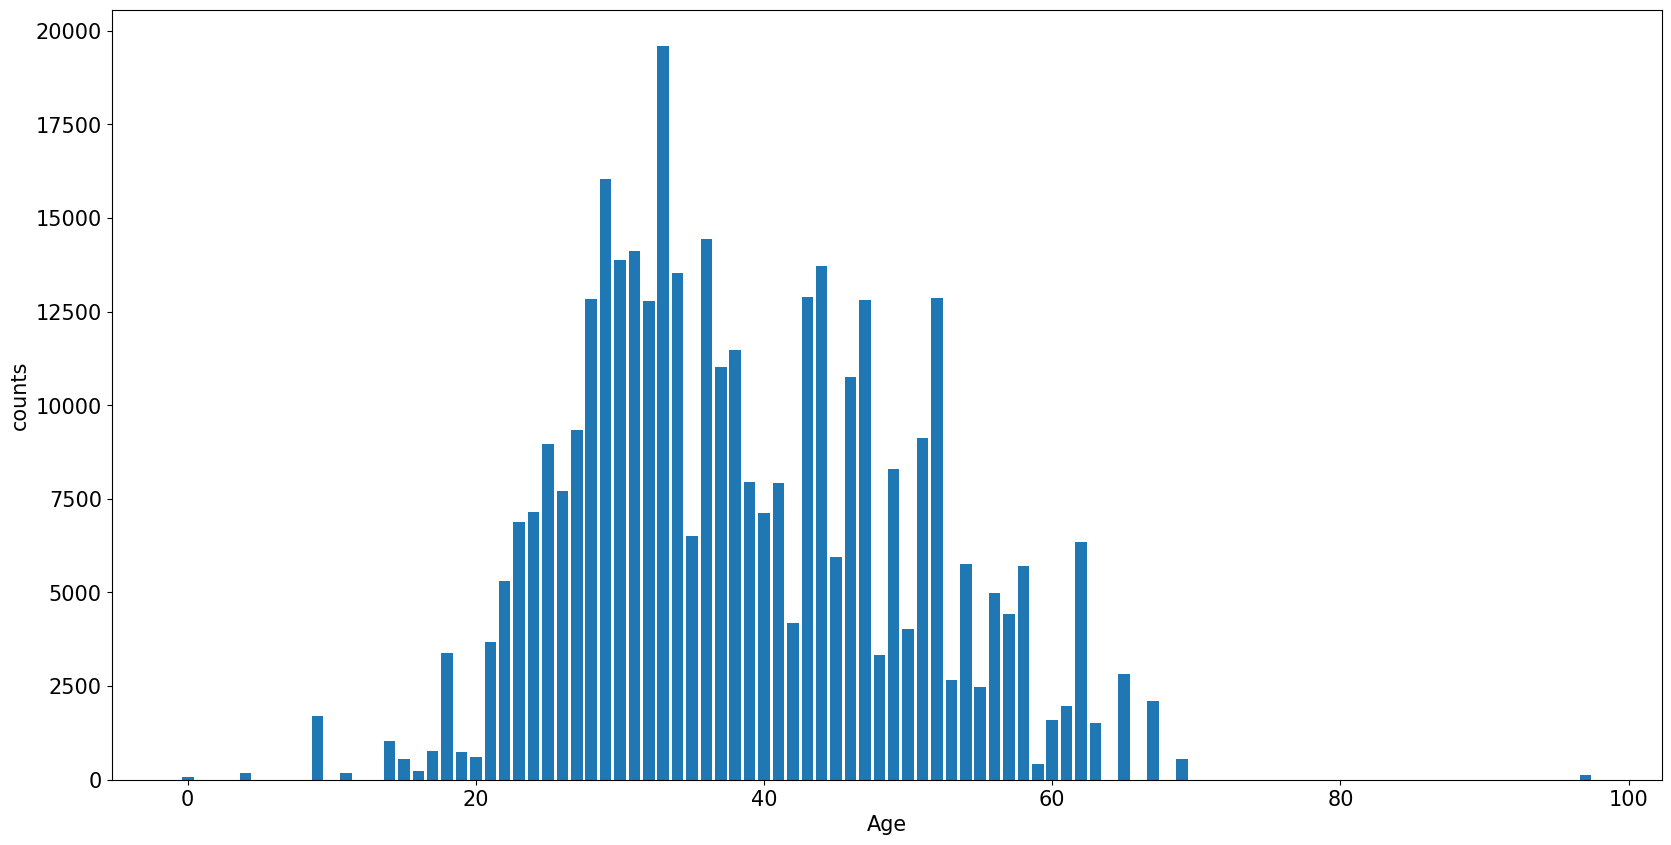

In [43]:
u = complete.Age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

In [44]:
# Note: Used Pandas Series.str.split method as it has an 'expand' parameter which can handle None cases
user_location_expanded = complete.Location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['City', 'State', 'Country']
complete = complete.join(user_location_expanded)
complete

userID        ISBN  bookRating  \
0       277427  002542730X          10   
1       277427  0026217457           0   
2       277427  003008685X           8   
3       277427  0030615321           0   
4       277427  0060002050           0   
...        ...         ...         ...   
483874   95902  848627916X           7   
483875   95902  8489779015           0   
483876   95902  8495359405           8   
483877   95902  8497081048           8   
483878   95902  9507427872           0   

                                                bookTitle  \
0       Politically Correct Bedtime Stories: Modern Ta...   
1                      Vegetarian Times Complete Cookbook   
2                                                Pioneers   
3        Ask for May, Settle for June (A Doonesbury book)   
4                       On a Wicked Dawn (Cynster Novels)   
...                                                   ...   
483874                   Temporada baixa (Espai de dones)   
483875                         Ahorcaron a Mi Pobre Billy   
483876                                           Senectud   
483877                                   L'Ombra del Vent   
483878                                      El Anatomista   

                        bookAuthor  yearOfPublication  \
0                James Finn Garner               1994   
1                       Lucy  Moll               1995   
2            James Fenimore Cooper               1974   
3                    G. B. Trudeau               1982   
4                Stephanie Laurens               2002   
...                            ...                ...   
483874  Maria MercÃ¨ Roca i Perich               1990   
483875               Robert Graves               2001   
483876                 Italo Svevo               2003   
483877          Carlos Ruiz ZafÃ³n               2003   
483878           Federico Andahazi               1997   

                        publisher                     Location    Age  \
0       John Wiley &amp; Sons Inc        gilbert, arizona, usa 48.000   
1           John Wiley &amp; Sons        gilbert, arizona, usa 48.000   
2                Thomson Learning        gilbert, arizona, usa 48.000   
3             Henry Holt &amp; Co        gilbert, arizona, usa 48.000   
4                      Avon Books        gilbert, arizona, usa 48.000   
...                           ...                          ...    ...   
483874     Edicions de l'Eixample  barcelona, catalunya, spain 57.000   
483875                     Altera  barcelona, catalunya, spain 57.000   
483876             Quaderns Crema  barcelona, catalunya, spain 57.000   
483877          Editorial Planeta  barcelona, catalunya, spain 57.000   
483878                    Planeta  barcelona, catalunya, spain 57.000   

             City       State Country  
0         gilbert     arizona     usa  
1         gilbert     arizona     usa  
2         gilbert     arizona     usa  
3         gilbert     arizona     usa  
4         gilbert     arizona     usa  
...           ...         ...     ...  
483874  barcelona   catalunya   spain  
483875  barcelona   catalunya   spain  
483876  barcelona   catalunya   spain  
483877  barcelona   catalunya   spain  
483878  barcelona   catalunya   spain  

[369125 rows x 12 columns]

In [45]:
complete['Country'] = complete['Country'].str.strip(' ')
complete.Country.unique()

array(['usa', 'canada', 'portugal', 'united kingdom',
       'dominican republic', 'malaysia', 'australia', 'belgium', 'spain',
       'england, united kingdom', 'finland', 'china', 'netherlands',
       'germany', 'brazil', 'romania', 'france', 'iran',
       'new york, georgia, usa', 'switzerland', 'denmark', 'qatar', '',
       'new zealand', 'austria', 'japan', 'ohio, usa'], dtype=object)

In [46]:
complete['Country'].replace('new york, georgia, usa','usa', inplace=True)


In [47]:
complete['Country'].replace('ohio, usa','usa', inplace=True)

In [48]:
complete['Country'].replace('england, united kingdom','england', inplace=True)

In [49]:
x = complete[complete['Country'] == ''] 

In [50]:
x['City'].unique()

array(['iowa city', 'houma', 'bourbonnais'], dtype=object)

In [51]:
complete['Country'].replace('','usa', inplace=True)

In [52]:
complete.Country.unique()

array(['usa', 'canada', 'portugal', 'united kingdom',
       'dominican republic', 'malaysia', 'australia', 'belgium', 'spain',
       'england', 'finland', 'china', 'netherlands', 'germany', 'brazil',
       'romania', 'france', 'iran', 'switzerland', 'denmark', 'qatar',
       'new zealand', 'austria', 'japan'], dtype=object)

In [53]:
country_list = list(complete['Country'].sort_values().unique())
country_list = [element.upper() for element in country_list]

In [54]:
country_list

['AUSTRALIA',
 'AUSTRIA',
 'BELGIUM',
 'BRAZIL',
 'CANADA',
 'CHINA',
 'DENMARK',
 'DOMINICAN REPUBLIC',
 'ENGLAND',
 'FINLAND',
 'FRANCE',
 'GERMANY',
 'IRAN',
 'JAPAN',
 'MALAYSIA',
 'NETHERLANDS',
 'NEW ZEALAND',
 'PORTUGAL',
 'QATAR',
 'ROMANIA',
 'SPAIN',
 'SWITZERLAND',
 'UNITED KINGDOM',
 'USA']

In [55]:
#Function to check for invalid Country names

#https://medium.com/@richamonga86/do-you-want-to-check-if-country-name-coming-in-your-data-is-correct-or-not-5583cee1b960
import pycountry_convert as pc
import pycountry

def country_name_check():
    pycntrylst = list(pycountry.countries)
    name = []
    common_name = []
    official_name = []
    invalid_countrynames =[]

    for i in pycntrylst:
 
        name.append(i.name)
        if hasattr(i, "common_name"):
            common_name.append(i.common_name)
        else:
            common_name.append("")
        if hasattr(i, "official_name"):
            official_name.append(i.official_name)
        else:
            official_name.append("")
    for j in country_list:
        if j not in map(str.upper,name) and j not in map(str.upper,common_name) and j not in map(str.upper,official_name):
            invalid_countrynames.append(j)
            
    invalid_countrynames = sorted(list(set(invalid_countrynames)))
    
   
    return print(invalid_countrynames)

In [56]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369125 entries, 0 to 483878
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   userID             369125 non-null  int64  
 1   ISBN               369125 non-null  object 
 2   bookRating         369125 non-null  int64  
 3   bookTitle          369125 non-null  object 
 4   bookAuthor         369125 non-null  object 
 5   yearOfPublication  369125 non-null  int64  
 6   publisher          369123 non-null  object 
 7   Location           369125 non-null  object 
 8   Age                369125 non-null  float64
 9   City               369125 non-null  object 
 10  State              369125 non-null  object 
 11  Country            369125 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 44.7+ MB


In [57]:
country_name_check();

['ENGLAND', 'IRAN', 'USA']


In [58]:
complete['Country'].unique()

array(['usa', 'canada', 'portugal', 'united kingdom',
       'dominican republic', 'malaysia', 'australia', 'belgium', 'spain',
       'england', 'finland', 'china', 'netherlands', 'germany', 'brazil',
       'romania', 'france', 'iran', 'switzerland', 'denmark', 'qatar',
       'new zealand', 'austria', 'japan'], dtype=object)

In [59]:
pycountry.countries.search_fuzzy('IRAN')

[Country(alpha_2='IR', alpha_3='IRN', flag='🇮🇷', name='Iran, Islamic Republic of', numeric='364', official_name='Islamic Republic of Iran'),
 Country(alpha_2='AL', alpha_3='ALB', flag='🇦🇱', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='SI', alpha_3='SVN', flag='🇸🇮', name='Slovenia', numeric='705', official_name='Republic of Slovenia'),
 Country(alpha_2='VE', alpha_3='VEN', common_name='Venezuela', flag='🇻🇪', name='Venezuela, Bolivarian Republic of', numeric='862', official_name='Bolivarian Republic of Venezuela'),
 Country(alpha_2='BT', alpha_3='BTN', flag='🇧🇹', name='Bhutan', numeric='064', official_name='Kingdom of Bhutan'),
 Country(alpha_2='PH', alpha_3='PHL', flag='🇵🇭', name='Philippines', numeric='608', official_name='Republic of the Philippines'),
 Country(alpha_2='MG', alpha_3='MDG', flag='🇲🇬', name='Madagascar', numeric='450', official_name='Republic of Madagascar')]

In [60]:
pycountry.countries.search_fuzzy('USA')

[Country(alpha_2='US', alpha_3='USA', flag='🇺🇸', name='United States', numeric='840', official_name='United States of America'),
 Country(alpha_2='ID', alpha_3='IDN', flag='🇮🇩', name='Indonesia', numeric='360', official_name='Republic of Indonesia'),
 Country(alpha_2='AZ', alpha_3='AZE', flag='🇦🇿', name='Azerbaijan', numeric='031', official_name='Republic of Azerbaijan'),
 Country(alpha_2='PH', alpha_3='PHL', flag='🇵🇭', name='Philippines', numeric='608', official_name='Republic of the Philippines'),
 Country(alpha_2='TR', alpha_3='TUR', flag='🇹🇷', name='Turkey', numeric='792', official_name='Republic of Turkey'),
 Country(alpha_2='KR', alpha_3='KOR', common_name='South Korea', flag='🇰🇷', name='Korea, Republic of', numeric='410'),
 Country(alpha_2='OM', alpha_3='OMN', flag='🇴🇲', name='Oman', numeric='512', official_name='Sultanate of Oman'),
 Country(alpha_2='ZM', alpha_3='ZMB', flag='🇿🇲', name='Zambia', numeric='894', official_name='Republic of Zambia'),
 Country(alpha_2='EE', alpha_3=

In [61]:
pycountry.countries.search_fuzzy('UNITED KINGDOM')

[Country(alpha_2='GB', alpha_3='GBR', flag='🇬🇧', name='United Kingdom', numeric='826', official_name='United Kingdom of Great Britain and Northern Ireland')]

In [62]:
complete['Country'].replace(to_replace = 'england', value = 'united kingdom', inplace = True)
complete['Country'].replace(to_replace = 'usa', value = 'United States of America', inplace = True)
complete['Country'].replace(to_replace = 'iran', value = 'Islamic Republic of Iran', inplace = True)

In [63]:
complete

userID        ISBN  bookRating  \
0       277427  002542730X          10   
1       277427  0026217457           0   
2       277427  003008685X           8   
3       277427  0030615321           0   
4       277427  0060002050           0   
...        ...         ...         ...   
483874   95902  848627916X           7   
483875   95902  8489779015           0   
483876   95902  8495359405           8   
483877   95902  8497081048           8   
483878   95902  9507427872           0   

                                                bookTitle  \
0       Politically Correct Bedtime Stories: Modern Ta...   
1                      Vegetarian Times Complete Cookbook   
2                                                Pioneers   
3        Ask for May, Settle for June (A Doonesbury book)   
4                       On a Wicked Dawn (Cynster Novels)   
...                                                   ...   
483874                   Temporada baixa (Espai de dones)   
483875                         Ahorcaron a Mi Pobre Billy   
483876                                           Senectud   
483877                                   L'Ombra del Vent   
483878                                      El Anatomista   

                        bookAuthor  yearOfPublication  \
0                James Finn Garner               1994   
1                       Lucy  Moll               1995   
2            James Fenimore Cooper               1974   
3                    G. B. Trudeau               1982   
4                Stephanie Laurens               2002   
...                            ...                ...   
483874  Maria MercÃ¨ Roca i Perich               1990   
483875               Robert Graves               2001   
483876                 Italo Svevo               2003   
483877          Carlos Ruiz ZafÃ³n               2003   
483878           Federico Andahazi               1997   

                        publisher                     Location    Age  \
0       John Wiley &amp; Sons Inc        gilbert, arizona, usa 48.000   
1           John Wiley &amp; Sons        gilbert, arizona, usa 48.000   
2                Thomson Learning        gilbert, arizona, usa 48.000   
3             Henry Holt &amp; Co        gilbert, arizona, usa 48.000   
4                      Avon Books        gilbert, arizona, usa 48.000   
...                           ...                          ...    ...   
483874     Edicions de l'Eixample  barcelona, catalunya, spain 57.000   
483875                     Altera  barcelona, catalunya, spain 57.000   
483876             Quaderns Crema  barcelona, catalunya, spain 57.000   
483877          Editorial Planeta  barcelona, catalunya, spain 57.000   
483878                    Planeta  barcelona, catalunya, spain 57.000   

             City       State                   Country  
0         gilbert     arizona  United States of America  
1         gilbert     arizona  United States of America  
2         gilbert     arizona  United States of America  
3         gilbert     arizona  United States of America  
4         gilbert     arizona  United States of America  
...           ...         ...                       ...  
483874  barcelona   catalunya                     spain  
483875  barcelona   catalunya                     spain  
483876  barcelona   catalunya                     spain  
483877  barcelona   catalunya                     spain  
483878  barcelona   catalunya                     spain  

[369125 rows x 12 columns]

In [64]:
# In order to avoid rating bias & for making good recommendations, limit the dataset to only those

v = complete.ISBN.value_counts()

complete = complete[complete.ISBN.isin(v.index[v.gt(30)])]



complete

userID        ISBN  bookRating  \
0       277427  002542730X          10   
13      277427  0060930535           0   
15      277427  0060934417           0   
18      277427  0061009059           9   
27      277427  0140067477           0   
...        ...         ...         ...   
481384  216012  0515136530           7   
481395  216012  1551669293           8   
482311  144131  0440224675           0   
482643   35433  0385511612           0   
483270  142454  0345369947           0   

                                                bookTitle          bookAuthor  \
0       Politically Correct Bedtime Stories: Modern Ta...   James Finn Garner   
13                          The Poisonwood Bible: A Novel  Barbara Kingsolver   
15                                     Bel Canto: A Novel        Ann Patchett   
18      One for the Money (Stephanie Plum Novels (Pape...     Janet Evanovich   
27                                        The Tao of Pooh       Benjamin Hoff   
...                                                   ...                 ...   
481384      Key of Valor (Roberts, Nora. Key Trilogy, 3.)        Nora Roberts   
481395                                  204 Rosewood Lane     Debbie Macomber   
482311                                           Hannibal       Thomas Harris   
482643                                          Bleachers        John Grisham   
483270                     The Mummy or Ramses the Damned           Anne Rice   

        yearOfPublication                  publisher  \
0                    1994  John Wiley &amp; Sons Inc   
13                   1999                  Perennial   
15                   2002                  Perennial   
18                   1995                HarperTorch   
27                   1983              Penguin Books   
...                   ...                        ...   
481384               2003                 Jove Pubns   
481395               2002                       Mira   
482311               2000    Dell Publishing Company   
482643               2003                  Doubleday   
483270               1991           Ballantine Books   

                            Location    Age      City      State  \
0              gilbert, arizona, usa 48.000   gilbert    arizona   
13             gilbert, arizona, usa 48.000   gilbert    arizona   
15             gilbert, arizona, usa 48.000   gilbert    arizona   
18             gilbert, arizona, usa 48.000   gilbert    arizona   
27             gilbert, arizona, usa 48.000   gilbert    arizona   
...                              ...    ...       ...        ...   
481384           clevelad, ohio, usa 34.000  clevelad       ohio   
481395           clevelad, ohio, usa 34.000  clevelad       ohio   
482311  croydon, victoria, australia 39.000   croydon   victoria   
482643   wangen, zürich, switzerland 40.000    wangen     zürich   
483270           wien, wien, austria 33.000      wien       wien   

                         Country  
0       United States of America  
13      United States of America  
15      United States of America  
18      United States of America  
27      United States of America  
...                          ...  
481384  United States of America  
481395  United States of America  
482311                 australia  
482643               switzerland  
483270                   austria  

[42075 rows x 12 columns]

## Building a recommender system using collaborative filtering

In [65]:
# creating a surprise object
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise import accuracy


reader = Reader(rating_scale=(0, 10))
data   = Dataset.load_from_df(complete[['userID','bookTitle','bookRating']], reader)


In [66]:
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import NormalPredictor
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import BaselineOnly

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=["MAE","RMSE"], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

C:\Users\micha\AppData\Local\Temp\ipykernel_6132\2724316391.py:18: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\micha\AppData\Local\Temp\ipykernel_6132\2724316391.py:18: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\micha\AppData\Local\Temp\ipykernel_6132\2724316391.py:18: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\micha\AppData\Local\Temp\ipykernel_6132\2724316391.py:18: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\micha\AppData\Local\Temp\ipykernel_6132\2724316391.py:18: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\micha\AppData\Local\Temp\ipykernel_6132\2724316391.py:18: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\micha\AppData\Local\Temp\ipykernel_6132\2724316391.py:18: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


C:\Users\micha\AppData\Local\Temp\ipykernel_6132\2724316391.py:18: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



test_mae  test_rmse  fit_time  test_time
Algorithm                                                
BaselineOnly        2.474      3.227     0.095      0.041
KNNWithMeans        2.389      3.298     0.128      0.812
KNNBaseline         2.402      3.304     0.160      0.959
SVD                 2.433      3.353     0.466      0.067
KNNBasic            2.489      3.481     0.098      0.792
SVDpp               2.515      3.621     4.540      0.945
NMF                 2.526      3.684     0.764      0.046
NormalPredictor     3.272      4.418     0.047      0.052

## Appling Grid search for the 4 best models

In [67]:
trainset, testset = train_test_split(data, test_size=0.2)


##  BaselineOnly 

In [68]:
param_grid_bl = {'bsl_options':{'method': ['als','sgd'],'n_epochs': [5, 10], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.2, 0.4, 0.6]}}


gs = GridSearchCV(BaselineOnly, param_grid_bl, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])
# best MAE score
print(gs.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])
# combination of parameters that gave the best MAE score
print(gs.best_params['mae'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [69]:
bsl_options = {'method': 'sgd',
               'n_epochs': 10,
               'lr_all': 0.001,
               'reg_all': 0.2
               }

algo = BaselineOnly(bsl_options=bsl_options)
predictions1 = algo.fit(trainset).test(testset)
rmse_BLO = accuracy.rmse(predictions1)
mae_BLO = accuracy.mae(predictions1)

Estimating biases using sgd...
RMSE: 3.2725
MAE:  2.4637


## kNN BASELINE

In [70]:
param_grid_knnbase =  {'bsl_options':{'method': ['als','sgd'],'n_epochs': [5, 10], 'reg_u': [3, 6, 9, 12],
              'reg_i': [3, 6, 9, 12]}}

knnmeans_knnb = GridSearchCV(KNNBaseline, param_grid_knnbase, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_knnb.fit(data)

# best RMSE score
print(knnmeans_knnb.best_score['rmse'])
# best MAE score
print(knnmeans_knnb.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(knnmeans_knnb.best_params['rmse'])
# combination of parameters that gave the best MAE score
print(knnmeans_knnb.best_params['mae'])

3.2938860896593907
2.38829517138275
{'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 6, 'reg_i': 12}}
{'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 3, 'reg_i': 12}}


In [71]:
bsl_options_knnB = {'method': 'als',
               'n_epochs': 10,
               'reg_u': 6,
               'reg_i': 12
               }

algoknnb = KNNBaseline(bsl_options_knnB=bsl_options_knnB)
predictionsknnb = algoknnb.fit(trainset).test(testset)
rmse_knnb = accuracy.rmse(predictionsknnb)
mae_knnb = accuracy.mae(predictionsknnb)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.3535
MAE:  2.4386


## KNN MEANS HP

In [72]:
param_grid_kmeans = {'k': [15, 20, 25, 30, 40, 50, 60]}

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid_kmeans, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs.fit(data)

print(f'RMSE Best Parameters KNN MEANS: {knnmeans_gs.best_params["rmse"]}')
print(f'RMSE Best Score KNN MEANS:      {knnmeans_gs.best_score["rmse"]}\n')

print(f'MAE Best Parameters KNN MEANS:  {knnmeans_gs.best_params["mae"]}')
print(f'MAE Best Score KNN MEANS:       {knnmeans_gs.best_score["mae"]}\n')

RMSE Best Parameters KNN MEANS: {'k': 60}
RMSE Best Score KNN MEANS:      3.298332703675438

MAE Best Parameters KNN MEANS:  {'k': 60}
MAE Best Score KNN MEANS:       2.3926222079477286



In [73]:
bsl_options_knnmeans = {'k': 60}

algokmeans = KNNWithMeans(bsl_options_knnmeans=bsl_options_knnmeans)
predictionsmeans = algokmeans.fit(trainset).test(testset)
rmse_means = accuracy.rmse(predictionsmeans)
mae_means = accuracy.mae(predictionsmeans)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.3395
MAE:  2.4188


## Hyperparameter tuning with GridSearchCV -  SVD

In [74]:
# Hyperparameter tuning - SVD

param_grid_SVD = {"n_factors": range(10,100,20),
              "n_epochs" : [5, 10, 20],
              "lr_all"   : [0.002, 0.005],
              "reg_all"  : [0.2, 0.5]}

gridsearchSVD = GridSearchCV(SVD, param_grid_SVD, measures=['mae', 'rmse'], cv=5, n_jobs=-1)
                                    
gridsearchSVD.fit(data)

print(f'MAE Best Parameters:  {gridsearchSVD.best_params["mae"]}')
print(f'MAE Best Score:       {gridsearchSVD.best_score["mae"]}\n')

print(f'RMSE Best Parameters: {gridsearchSVD.best_params["rmse"]}')
print(f'RMSE Best Score:      {gridsearchSVD.best_score["rmse"]}\n')

MAE Best Parameters:  {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}
MAE Best Score:       2.421511588986056

RMSE Best Parameters: {'n_factors': 90, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.5}
RMSE Best Score:      3.2083547394180227



In [75]:
algoSVD = SVD(n_factors=90, n_epochs = 20, lr_all=0.005, reg_all=0.5)
predictionsSVD = algoSVD.fit(trainset).test(testset)
rmse_SVD = accuracy.rmse(predictionsSVD)
mae_SVD = accuracy.mae(predictionsSVD)

RMSE: 3.2637
MAE:  2.5447


In [76]:
# Comparing all models using rmse

Evaluation_rmse = {'Models':pd.Series(['BaselineOnly', 'KNN Baseline', 'K Means',
                                      'SVD']),\
                  'Mean Squared Error':pd.Series([rmse_BLO, rmse_knnb, rmse_means, rmse_SVD])}

table_evaluation_rmse = pd.DataFrame(Evaluation_rmse)
table_evaluation_rmse.sort_values(['Mean Squared Error'], inplace = True)
table_evaluation_rmse

Models  Mean Squared Error
3           SVD               3.264
0  BaselineOnly               3.272
2       K Means               3.340
1  KNN Baseline               3.354

In [77]:
# Plotting models comparison by rmse

fig = px.histogram(table_evaluation_rmse, x = 'Models', y = 'Mean Squared Error', title = 'Models compared by Mean Squared Error',
                   color = 'Models', template = 'simple_white')

fig.update_layout(xaxis_title = 'Models', xaxis_title_font_size = 15, yaxis_title = 'Mean Squared Error',
                  yaxis_title_font_size = 15, font_family = 'Arial', font_color = 'black', title_font_family = 'Times New Roman',
                  title_font_size = 24, title_xanchor = 'left', xaxis_showticklabels = False)
fig.update_yaxes(range=[3.1, 3.3])

fig.show()

In [78]:
# Comparing all TES mae's

Evaluation_mae = {'Models':pd.Series(['BaselineOnly', 'KNN Baseline', 'K Means',
                                      'SVD']),\
                  'Mean Absolut Error':pd.Series([mae_BLO, mae_knnb, mae_means, mae_SVD])}

table_evaluation_mae = pd.DataFrame(Evaluation_mae)
table_evaluation_mae.sort_values(['Mean Absolut Error'], inplace = True)
table_evaluation_mae

Models  Mean Absolut Error
2       K Means               2.419
1  KNN Baseline               2.439
0  BaselineOnly               2.464
3           SVD               2.545

In [79]:
# Plotting models comparison by rmse

fig = px.histogram(table_evaluation_mae, x = 'Models', y = 'Mean Absolut Error', title = 'Models compared by Mean Absolut Error',
                   color = 'Models', template = 'simple_white')

fig.update_layout(xaxis_title = 'Models', xaxis_title_font_size = 15, yaxis_title = 'Mean Absolut Error',
                  yaxis_title_font_size = 15, font_family = 'Arial', font_color = 'black', title_font_family = 'Times New Roman',
                  title_font_size = 24, title_xanchor = 'left', xaxis_showticklabels = False)
fig.update_yaxes(range=[2.3, 2.6])

fig.show()

In [80]:
# SVD

def generate_recommendationsSVD(userID=13552, get_recommend = 10):
    
    ''' This function generates "get_recommend" number of book recommendations 
        using Singular value decomposition. The function needs as input two 
        different parameters:
        (1) userID i.e., userID for which recommendations need to be generated 
        (2) get_recommend i.e., number of recommendations to generate for the userID
        Default values are: userID=13552, get_recommend=10
    '''
    
    predictions_df = pd.DataFrame(predictionsSVD)
    
    # get the top get_recommend predictions for userID
    
    predictions_userID = predictions_df[predictions_df['uid'] == userID].\
                         sort_values(by="est", ascending = False).head(get_recommend)
    
    recommendations = []
    recommendations.append(list(predictions_userID['iid']))
    recommendations = recommendations[0]
    
    return(recommendations)

In [81]:
recommendationsSVD = generate_recommendationsSVD(userID=13552, get_recommend = 10)
recommendationsSVD = pd.DataFrame(recommendationsSVD)
recommendationsSVD

0
0         Key of Knowledge (Key Trilogy (Paperback))
1                           Angela's Ashes: A Memoir
2  Confessions of a Shopaholic (Summer Display Op...
3                                The Handmaid's Tale
4                           White Oleander : A Novel
5                  Tears of the Moon (Irish Trilogy)
6                                  The Street Lawyer
7  The Lost Boy: A Foster Child's Search for the ...
8                             The Voice of the Night
9   The Witching Hour (Lives of the Mayfair Witches)

In [82]:
# k Means

def generate_recommendationsmeans(userID=13552, get_recommend =10):
    
    ''' This function generates "get_recommend" number of book recommendations 
        using Singular value decomposition. The function needs as input two 
        different parameters:
        (1) userID i.e., userID for which recommendations need to be generated 
        (2) get_recommend i.e., number of recommendations to generate for the userID
        Default values are: userID=13552, get_recommend=10
    '''
    
    predictions_dfmeans = pd.DataFrame(predictionsmeans)
    
    # get the top get_recommend predictions for userID
    
    predictions_userIDmeans = predictions_dfmeans[predictions_dfmeans['uid'] == userID].\
                         sort_values(by="est", ascending = False).head(get_recommend)
    
    recommendationsmeans = []
    recommendationsmeans.append(list(predictions_userIDmeans['iid']))
    recommendationsmeans = recommendationsmeans[0]
    
    return(recommendationsmeans)

In [83]:
recommendationsmeans = generate_recommendationsmeans(userID=13552, get_recommend =10)
recommendationsmeans = pd.DataFrame(recommendationsmeans)
recommendationsmeans

0
0                           Angela's Ashes: A Memoir
1                              It's Always Something
2   The Witching Hour (Lives of the Mayfair Witches)
3  Confessions of a Shopaholic (Summer Display Op...
4                                     Melody (Logan)
5                                  The Street Lawyer
6                  Tears of the Moon (Irish Trilogy)
7                                   The Runaway Jury
8                             The Voice of the Night
9         Key of Knowledge (Key Trilogy (Paperback))

5 recommendations matching

## Market Basket Analisis

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_csv('basket.csv')

In [86]:
data = data.fillna(0)

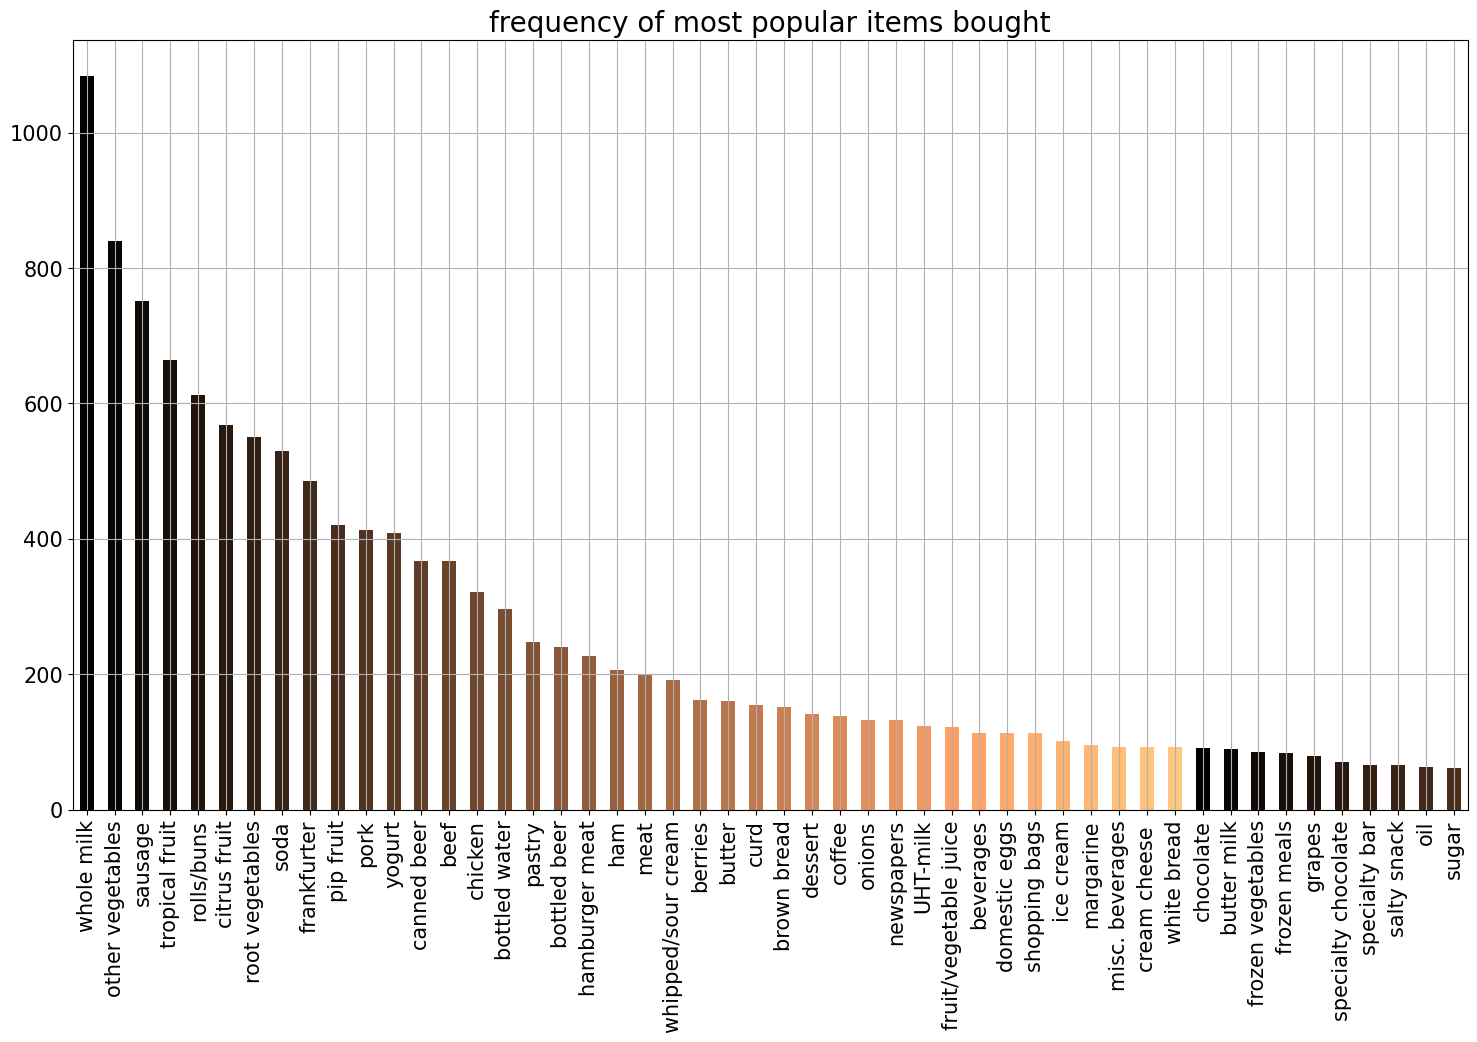

In [87]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 10)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['0'].value_counts().head(50).plot.bar(color = color)
plt.title('frequency of most popular items bought', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [88]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)

In [89]:
import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = '0', edge_attr = True)

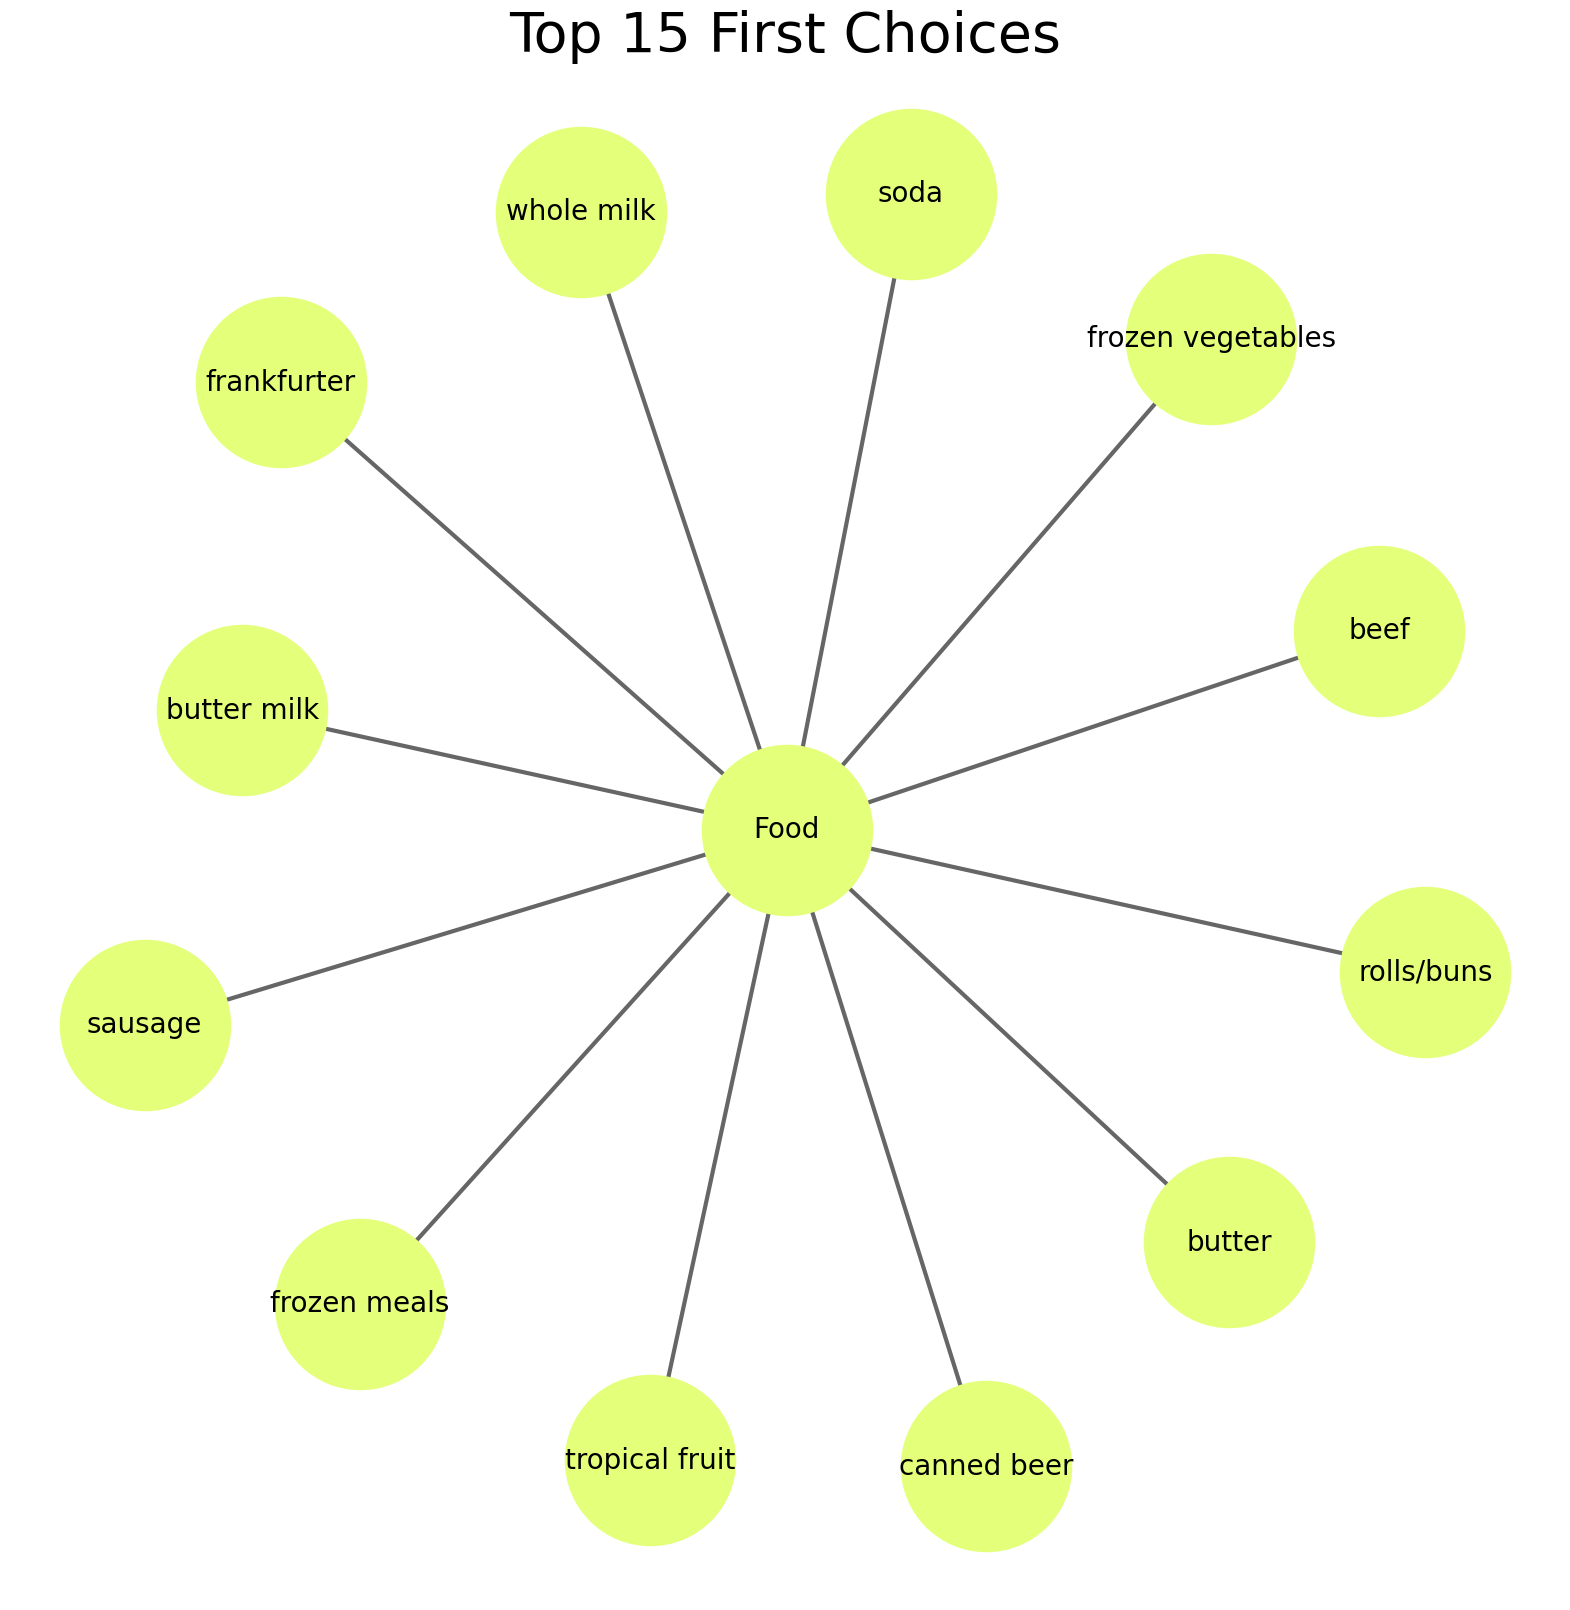

In [90]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [91]:
data.drop(['food'], axis=1, inplace=True)

In [92]:
items = (data['0'].unique())

for i in items:
    print(i)
    
#Finding unique items in column 1 (Mostly having all the unique items )

whole milk
sausage
soda
canned beer
frankfurter
beef
butter
frozen vegetables
tropical fruit
butter milk
frozen meals
rolls/buns
root vegetables
dish cleaner
pip fruit
other vegetables
whipped/sour cream
bottled water
shopping bags
hamburger meat
canned fish
herbs
pastry
kitchen towels
curd cheese
citrus fruit
processed cheese
hard cheese
mustard
white bread
fruit/vegetable juice
salty snack
soft cheese
UHT-milk
chicken
yogurt
brown bread
curd
beverages
berries
sliced cheese
liquor
male cosmetics
domestic eggs
fish
coffee
ham
softener
pork
onions
specialty chocolate
dessert
ice cream
margarine
Instant food products
prosecco
napkins
sweet spreads
specialty bar
waffles
pasta
house keeping products
meat
bottled beer
photo/film
cream cheese 
long life bakery product
red/blush wine
oil
salt
finished products
detergent
semi-finished bread
misc. beverages
newspapers
chocolate marshmallow
pickled vegetables
packaged fruit/vegetables
grapes
spread cheese
candy
cream
liver loaf
frozen potato pro

In [93]:

encoded_vals = []
for index, row in data.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
encod_df = pd.DataFrame(encoded_vals)

#Encoding values 

encod_df

prosecco  fish  potato products  male cosmetics  white wine  \
0             0     0                0               0           0   
1             0     0                0               0           0   
2             0     0                0               0           0   
3             0     0                0               0           0   
4             0     0                0               0           0   
...         ...   ...              ...             ...         ...   
14958         0     0                0               0           0   
14959         0     0                0               0           0   
14960         0     0                0               0           0   
14961         0     0                0               0           0   
14962         0     0                0               0           0   

       tropical fruit  chocolate marshmallow  cling film/bags  snack products  \
0                   0                      0                0               0   
1                   0                      0                0               0   
2                   0                      0                0               0   
3                   0                      0                0               0   
4                   0                      0                0               0   
...               ...                    ...              ...             ...   
14958               0                      0                0               0   
14959               0                      0                0               0   
14960               0                      0                0               0   
14961               0                      0                0               0   
14962               0                      0                0               0   

       tidbits  ...  dessert  herbs  spices  dishes  specialty cheese  \
0            0  ...        0      0       0       0                 0   
1            0  ...        0      0       0       0                 0   
2            0  ...        0      0       0       0                 0   
3            0  ...        0      0       0       0                 0   
4            0  ...        0      0       0       0                 0   
...        ...  ...      ...    ...     ...     ...               ...   
14958        0  ...        0      0       0       0                 0   
14959        0  ...        0      1       0       0                 0   
14960        0  ...        0      0       0       0                 0   
14961        0  ...        0      0       0       0                 0   
14962        0  ...        0      0       0       0                 0   

       ketchup  ice cream  salty snack  pastry  whole milk  
0            0          0            1       1           1  
1            0          0            0       0           1  
2            0          0            0       0           0  
3            0          0            0       0           0  
4            0          0            0       0           0  
...        ...        ...          ...     ...         ...  
14958        0          0            0       0           0  
14959        0          0            0       0           0  
14960        0          0            0       0           0  
14961        0          0            0       0           0  
14962        0          0            0       0           0  

[14963 rows x 165 columns]

In [94]:
data.describe()

0           1      2      3      4      5      6      7  \
count        14963       14963  14963  14963  14963  14963  14963  14963   
unique         165         165    155    147    127    102     89     73   
top     whole milk  whole milk      0      0      0      0      0      0   
freq          1083         983  10080  12778  14168  14512  14687  14767   

            8      9     10  
count   14963  14963  14963  
unique     36      2      2  
top         0      0      0  
freq    14912  14962  14962

In [95]:
from mlxtend.frequent_patterns import fpgrowth
freq_items = fpgrowth(encod_df , min_support = 0.00005 , use_colnames = True)
freq_items

C:\Users\micha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                                           itemsets
0        0.158                                       (whole milk)
1        0.052                                           (pastry)
2        0.019                                      (salty snack)
3        0.086                                           (yogurt)
4        0.060                                          (sausage)
...        ...                                                ...
63161    0.000  (specialty cheese, canned fish, specialty vege...
63162    0.000        (yogurt, canned fish, specialty vegetables)
63163    0.000  (specialty cheese, yogurt, canned fish, specia...
63164    0.000  (bottled water, whipped/sour cream, specialty ...
63165    0.000  (frozen vegetables, specialty vegetables, saus...

[63166 rows x 2 columns]

In [96]:
#Top 15 most frequent items
most_popular_items=freq_items.sort_values('support',ascending=False)
most_popular_items = most_popular_items.head(15)
most_popular_items


support            itemsets
0     0.158        (whole milk)
18    0.122  (other vegetables)
11    0.110        (rolls/buns)
6     0.097              (soda)
3     0.086            (yogurt)
26    0.070   (root vegetables)
20    0.068    (tropical fruit)
37    0.061     (bottled water)
4     0.060           (sausage)
63    0.053      (citrus fruit)
1     0.052            (pastry)
31    0.049         (pip fruit)
34    0.048     (shopping bags)
8     0.047       (canned beer)
41    0.045      (bottled beer)

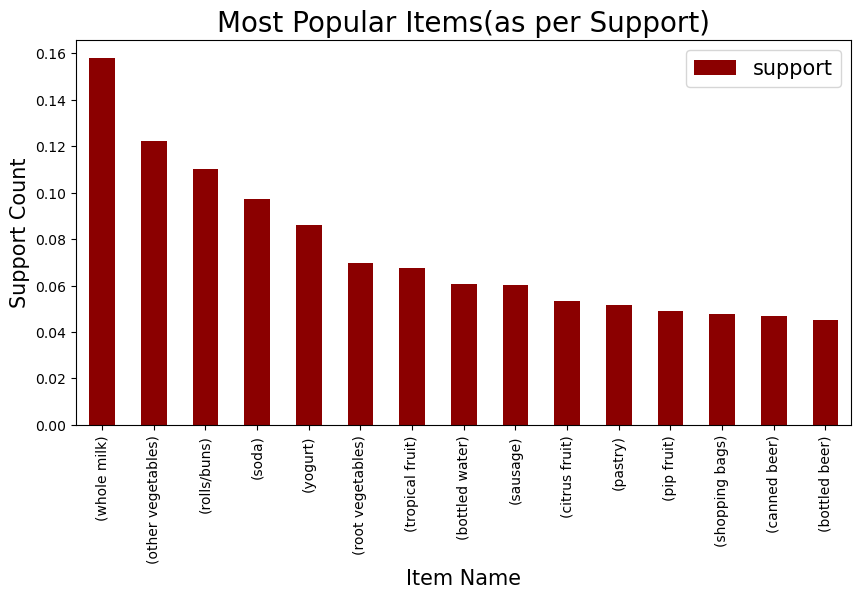

In [97]:
most_popular_items.values.tolist()

plt.rcParams['figure.figsize']=(10,5)
most_popular_items.plot.bar('itemsets','support',color='darkred')
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Support Count',fontsize=15)
plt.title('Most Popular Items(as per Support)',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [98]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.05)
rules.head(100)


antecedents                     consequents  \
0                                 (pastry)                    (whole milk)   
1                                 (pastry)               (root vegetables)   
2                                 (pastry)              (other vegetables)   
3                                 (pastry)                        (yogurt)   
4                                 (pastry)                       (sausage)   
..                                     ...                             ...   
95    (soda, other vegetables, whole milk)            (rolls/buns, pastry)   
96              (soda, rolls/buns, pastry)  (other vegetables, whole milk)   
97              (soda, whole milk, pastry)  (other vegetables, rolls/buns)   
98          (soda, rolls/buns, whole milk)      (other vegetables, pastry)   
99  (other vegetables, pastry, rolls/buns)              (soda, whole milk)   

    antecedent support  consequent support  support  confidence   lift  \
0                0.052               0.158    0.006       0.125  0.794   
1                0.052               0.070    0.003       0.056  0.799   
2                0.052               0.122    0.004       0.071  0.582   
3                0.052               0.086    0.004       0.070  0.812   
4                0.052               0.060    0.003       0.062  1.028   
..                 ...                 ...      ...         ...    ...   
95               0.001               0.004    0.000       0.059 14.918   
96               0.000               0.015    0.000       0.167 11.233   
97               0.001               0.011    0.000       0.071  6.764   
98               0.001               0.004    0.000       0.067 18.137   
99               0.001               0.012    0.000       0.125 10.749   

    leverage  conviction  
0     -0.002       0.963  
1     -0.001       0.985  
2     -0.003       0.945  
3     -0.001       0.983  
4      0.000       1.002  
..       ...         ...  
95     0.000       1.058  
96     0.000       1.182  
97     0.000       1.066  
98     0.000       1.067  
99     0.000       1.130  

[100 rows x 9 columns]

In [99]:
association_confi=association_rules(freq_items,metric='confidence',min_threshold=0.05)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(20)

antecedents  \
892809  (hamburger meat, tropical fruit, zwieback, sau...   
713588                         (curd, pasta, brown bread)   
404955    (fruit/vegetable juice, tropical fruit, grapes)   
713596                          (curd, pasta, whole milk)   
933101  (tropical fruit, pastry, detergent, syrup, who...   
713595                          (curd, pasta, rolls/buns)   
903798  (seasonal products, yogurt, long life bakery p...   
404961    (fruit/vegetable juice, tropical fruit, grapes)   
404963         (tropical fruit, other vegetables, grapes)   
933100  (tropical fruit, other vegetables, pastry, syr...   
404966  (curd, tropical fruit, fruit/vegetable juice, ...   
404967  (curd, tropical fruit, fruit/vegetable juice, ...   
404968  (curd, fruit/vegetable juice, whipped/sour cre...   
404969  (curd, tropical fruit, whipped/sour cream, gra...   
404970  (fruit/vegetable juice, tropical fruit, whippe...   
713589                    (curd, rolls/buns, brown bread)   
404972  (curd, fruit/vegetable juice, whipped/sour cream)   
404954              (curd, fruit/vegetable juice, grapes)   
933102  (other vegetables, pastry, detergent, syrup, w...   
933103  (curd, tropical fruit, other vegetables, deter...   

                          consequents  support  confidence      lift  \
892809                (domestic eggs)    0.000       1.000    26.960   
713588                   (rolls/buns)    0.000       1.000     9.091   
404955                         (curd)    0.000       1.000    29.688   
713596                   (rolls/buns)    0.000       1.000     9.091   
933101       (curd, other vegetables)    0.000       1.000   282.321   
713595                   (whole milk)    0.000       1.000     6.332   
903798  (whole milk, berries, pastry)    0.000       1.000  7481.500   
404961             (other vegetables)    0.000       1.000     8.190   
404963        (fruit/vegetable juice)    0.000       1.000    29.397   
933100              (curd, detergent)    0.000       1.000  4987.667   
404966                       (grapes)    0.000       1.000    69.273   
404967           (whipped/sour cream)    0.000       1.000    22.879   
404968               (tropical fruit)    0.000       1.000    14.756   
404969        (fruit/vegetable juice)    0.000       1.000    29.397   
404970                         (curd)    0.000       1.000    29.688   
713589                        (pasta)    0.000       1.000   123.661   
404972       (tropical fruit, grapes)    0.000       1.000  1151.000   
404954               (tropical fruit)    0.000       1.000    14.756   
933102         (curd, tropical fruit)    0.000       1.000   534.393   
933103    (syrup, whole milk, pastry)    0.000       1.000 14963.000   

        leverage  conviction  
892809     0.000         inf  
713588     0.000         inf  
404955     0.000         inf  
713596     0.000         inf  
933101     0.000         inf  
713595     0.000         inf  
903798     0.000         inf  
404961     0.000         inf  
404963     0.000         inf  
933100     0.000         inf  
404966     0.000         inf  
404967     0.000         inf  
404968     0.000         inf  
404969     0.000         inf  
404970     0.000         inf  
713589     0.000         inf  
404972     0.000         inf  
404954     0.000         inf  
933102     0.000         inf  
933103     0.000         inf

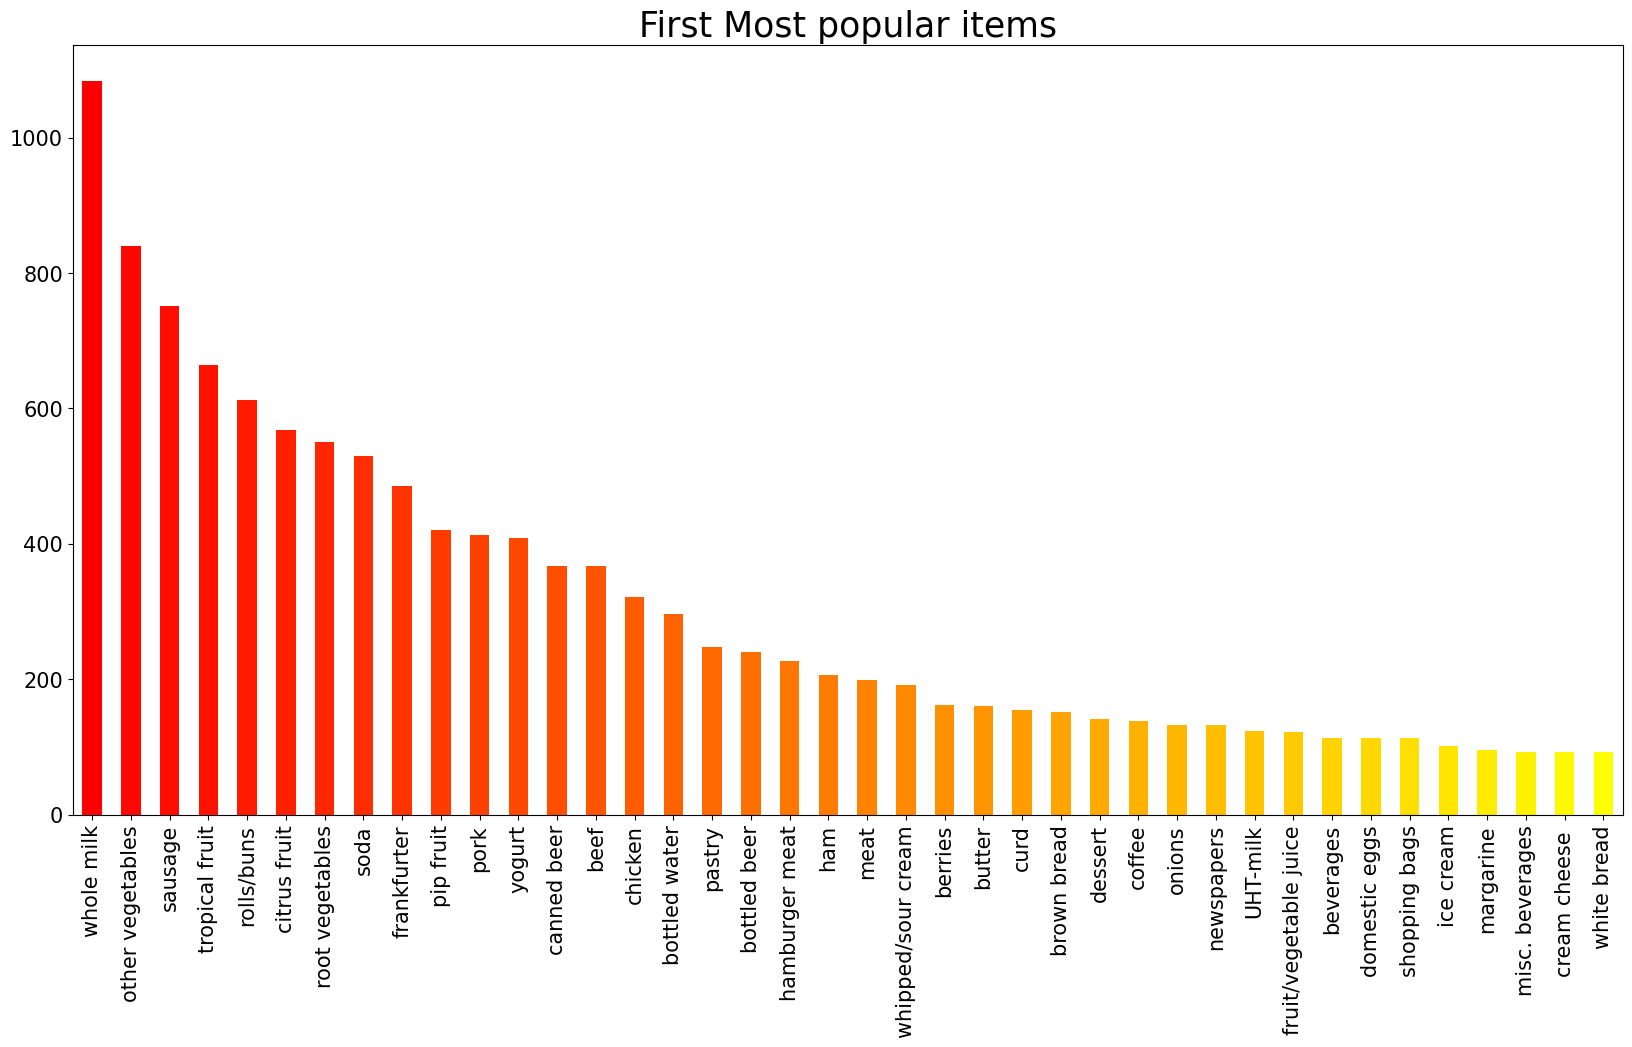

In [100]:
plt.rcParams['figure.figsize'] = (20, 10)
color = plt.cm.autumn(np.linspace(0, 1, 40))
data['0'].value_counts().head(40).plot.bar(color = color)
plt.title('First Most popular items', fontsize = 25)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
#plt.grid()

plt.show()

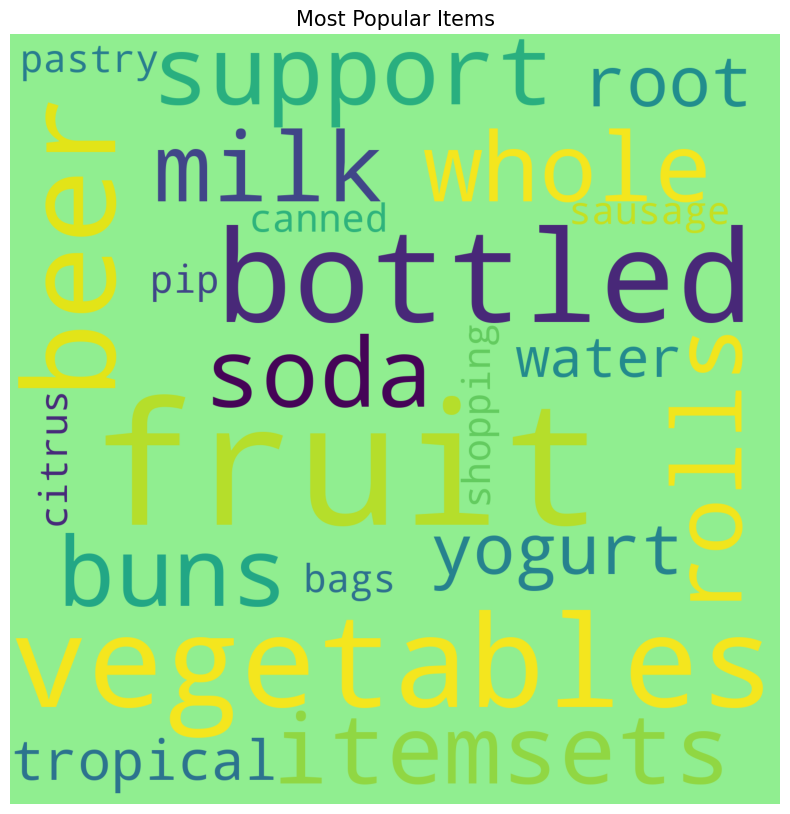

In [101]:
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)
wordcloud=WordCloud(background_color = 'lightgreen', width = 1500, height = 1500, max_words = 121).generate(str(most_popular_items))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()


## Apriori

In [102]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(encod_df, min_support=0.001, use_colnames=True)

In [103]:
frequent_itemsets.head()

support           itemsets
0    0.001         (prosecco)
1    0.002             (fish)
2    0.002  (potato products)
3    0.002   (male cosmetics)
4    0.012       (white wine)

In [104]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.001)

rules.sort_values("support", ascending=False).head(5)

antecedents         consequents  antecedent support  \
977         (whole milk)  (other vegetables)               0.158   
976   (other vegetables)        (whole milk)               0.122   
1153        (whole milk)        (rolls/buns)               0.158   
1152        (rolls/buns)        (whole milk)               0.110   
1114              (soda)        (whole milk)               0.097   

      consequent support  support  confidence  lift  leverage  conviction  
977                0.122    0.015       0.094 0.769    -0.004       0.969  
976                0.158    0.015       0.122 0.769    -0.004       0.959  
1153               0.110    0.014       0.088 0.804    -0.003       0.976  
1152               0.158    0.014       0.127 0.804    -0.003       0.965  
1114               0.158    0.012       0.120 0.758    -0.004       0.957

In [105]:
sorted_rules = rules.sort_values("confidence", ascending=False)
sorted_rules

antecedents           consequents  antecedent support  \
1185      (yogurt, sausage)          (whole milk)               0.006   
1197  (rolls/buns, sausage)          (whole milk)               0.005   
1191        (soda, sausage)          (whole milk)               0.006   
1090  (semi-finished bread)          (whole milk)               0.009   
1226   (yogurt, rolls/buns)          (whole milk)               0.008   
...                     ...                   ...                 ...   
817            (whole milk)         (frozen fish)               0.158   
1194           (whole milk)       (soda, sausage)               0.158   
1173           (whole milk)  (pickled vegetables)               0.158   
155            (whole milk)          (pot plants)               0.158   
1237           (whole milk)    (soda, rolls/buns)               0.158   

      consequent support  support  confidence  lift  leverage  conviction  
1185               0.158    0.001       0.256 1.620     0.001       1.132  
1197               0.158    0.001       0.212 1.346     0.000       1.069  
1191               0.158    0.001       0.180 1.138     0.000       1.027  
1090               0.158    0.002       0.176 1.115     0.000       1.022  
1226               0.158    0.001       0.171 1.082     0.000       1.016  
...                  ...      ...         ...   ...       ...         ...  
817                0.007    0.001       0.007 0.993    -0.000       1.000  
1194               0.006    0.001       0.007 1.138     0.000       1.001  
1173               0.009    0.001       0.006 0.709    -0.000       0.997  
155                0.008    0.001       0.006 0.812    -0.000       0.999  
1237               0.008    0.001       0.006 0.785    -0.000       0.998  

[1238 rows x 9 columns]

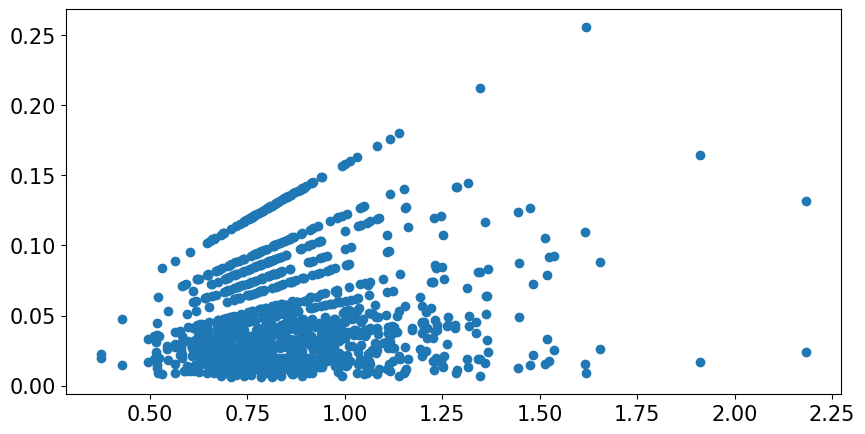

In [106]:
x = sorted_rules['lift']
y = sorted_rules['confidence']

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.scatter(x, y, vmin=0, vmax=100)

## FP-Growth

In [107]:
# Calculate the sfrequenct itemsets by calling a method fp growth
frequent_itemsets_fp = fpgrowth(encod_df, min_support = 0.001, use_colnames = True)

In [108]:
# Printing the frequent itens list
print(frequent_itemsets_fp)

     support                         itemsets
0      0.158                     (whole milk)
1      0.052                         (pastry)
2      0.019                    (salty snack)
3      0.086                         (yogurt)
4      0.060                        (sausage)
..       ...                              ...
745    0.001            (yogurt, chewing gum)
746    0.001  (other vegetables, chewing gum)
747    0.001              (soda, chewing gum)
748    0.001              (pasta, whole milk)
749    0.001  (seasonal products, rolls/buns)

[750 rows x 2 columns]


In [109]:
# Display the reles due to fp growth algorithm
rules_fp = association_rules(frequent_itemsets_fp, metric = 'support', min_threshold = 0.001)

rules_fp

antecedents          consequents  antecedent support  \
0            (whole milk)             (pastry)               0.158   
1                (pastry)         (whole milk)               0.052   
2       (root vegetables)             (pastry)               0.070   
3                (pastry)    (root vegetables)               0.052   
4      (other vegetables)             (pastry)               0.122   
...                   ...                  ...                 ...   
1233        (chewing gum)               (soda)               0.012   
1234              (pasta)         (whole milk)               0.008   
1235         (whole milk)              (pasta)               0.158   
1236  (seasonal products)         (rolls/buns)               0.007   
1237         (rolls/buns)  (seasonal products)               0.110   

      consequent support  support  confidence  lift  leverage  conviction  
0                  0.052    0.006       0.041 0.794    -0.002       0.989  
1                  0.158    0.006       0.125 0.794    -0.002       0.963  
2                  0.052    0.003       0.041 0.799    -0.001       0.989  
3                  0.070    0.003       0.056 0.799    -0.001       0.985  
4                  0.052    0.004       0.030 0.582    -0.003       0.978  
...                  ...      ...         ...   ...       ...         ...  
1233               0.097    0.001       0.083 0.858    -0.000       0.985  
1234               0.158    0.001       0.132 0.837    -0.000       0.970  
1235               0.008    0.001       0.007 0.837    -0.000       0.999  
1236               0.110    0.001       0.142 1.286     0.000       1.037  
1237               0.007    0.001       0.009 1.286     0.000       1.002  

[1238 rows x 9 columns]

In [110]:
sorted_fp = rules_fp.sort_values("confidence", ascending=False)
sorted_fp

antecedents           consequents  antecedent support  \
75        (yogurt, sausage)          (whole milk)               0.006   
81    (rolls/buns, sausage)          (whole milk)               0.005   
87          (soda, sausage)          (whole milk)               0.006   
92    (semi-finished bread)          (whole milk)               0.009   
52     (yogurt, rolls/buns)          (whole milk)               0.008   
...                     ...                   ...                 ...   
501            (whole milk)         (frozen fish)               0.158   
1235           (whole milk)               (pasta)               0.158   
1205           (whole milk)          (pot plants)               0.158   
113            (whole milk)    (soda, rolls/buns)               0.158   
121            (whole milk)  (pickled vegetables)               0.158   

      consequent support  support  confidence  lift  leverage  conviction  
75                 0.158    0.001       0.256 1.620     0.001       1.132  
81                 0.158    0.001       0.212 1.346     0.000       1.069  
87                 0.158    0.001       0.180 1.138     0.000       1.027  
92                 0.158    0.002       0.176 1.115     0.000       1.022  
52                 0.158    0.001       0.171 1.082     0.000       1.016  
...                  ...      ...         ...   ...       ...         ...  
501                0.007    0.001       0.007 0.993    -0.000       1.000  
1235               0.008    0.001       0.007 0.837    -0.000       0.999  
1205               0.008    0.001       0.006 0.812    -0.000       0.999  
113                0.008    0.001       0.006 0.785    -0.000       0.998  
121                0.009    0.001       0.006 0.709    -0.000       0.997  

[1238 rows x 9 columns]

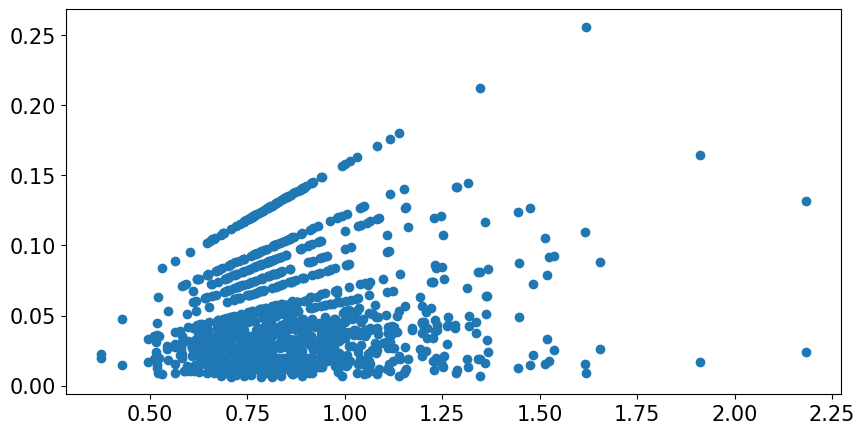

In [111]:
x1 = rules_fp['lift']
y1 = rules_fp['confidence']

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.scatter(x1, y1, vmin=0, vmax=100)

## Apriori versus FPGrowth

In [112]:
time_apriori = %timeit -n 100 -r 10 apriori(encod_df, min_support=0.6)

18.1 ms ± 963 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [113]:
time_fp = %timeit -n 100 -r 10 fpgrowth(encod_df, min_support=0.6)

77.6 ms ± 4.77 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [114]:
time_fp = 70.2
time_apriori = 15.2

In [115]:
Evaluation_time = {"Models":pd.Series(["Apriori","Fp Growth"]),\
    
        "Time":pd.Series([time_apriori,time_fp])}

table_evaluation_time = pd.DataFrame(Evaluation_time)
table_evaluation_time.sort_values(['Time'], inplace=True)
table_evaluation_time

Models   Time
0    Apriori 15.200
1  Fp Growth 70.200

In [116]:
# Plotting models comparison by rmse
import plotly.express as px
fig = px.histogram(table_evaluation_time, x = 'Models', y = 'Time',
                   title = 'Models compared by Time', color = 'Models', template = 'simple_white')

fig.update_layout(xaxis_title = 'Models', xaxis_title_font_size = 15, yaxis_title = 'Comparing Time',
                  yaxis_title_font_size = 15, font_family = 'Arial', font_color = 'black',
                  title_font_family = 'Times New Roman', title_font_size = 24, title_xanchor = 'left',
                  xaxis_showticklabels = False)

fig.show()

## Dashboard

In [117]:
#complete['City'].replace(to_replace = 'clevelad', value = 'cleveland', inplace = True)
#complete['City'].replace(to_replace = 'albq', value = 'albuquerque', inplace = True)
#complete = complete[complete.City != 'fpo']

In [118]:
#create variable column inside file called `myAddress and assign it to seleted address columns
#complete['query'] =  complete['City'] + " " + complete['Country']

#print new column with index -first 5 rows only
#complete.iloc[:, 12:13]


#from geopy.geocoders import Nominatim
'''
**Get Lat/Long Data with GeoPy**
---------------------

the code below calls a geopy API using a concatenated column of address values. We use this column as a query key 
to pull back cooresponding lat/long coordinates.
'''

#geolocator = Nominatim(user_agent="myApp")

#for i in complete.index:
#    try:
 #       #tries fetch address from geopy
#     location = geolocator.geocode(complete['query'][i])
        
#        #append lat/long to column using dataframe location
  #      complete.loc[i,'location_lat'] = location.latitude
    #    complete.loc[i,'location_long'] = location.longitude
        
    #except:
     #   #catches exception for the case where no value is returned
      #  #appends null value to column
       # complete.loc[i,'location_lat'] = ""
        #complete.loc[i,'location_long'] = ""
        

#print first rows as sample
#complete.head()


In [119]:
#complete = complete.replace(r'^\s*$', np.nan, regex=True)

In [120]:
#complete.info()

In [121]:
#complete['location_lat'].fillna('47.608013', inplace=True) 
#complete['location_long'].fillna('-122.335167', inplace=True) 

In [122]:
#write the contents thus far to new csv file
#complete.to_csv('geopy_data1.csv')

In [123]:
df = pd.read_csv('geopy_data1.csv')

In [124]:
df.head()

Unnamed: 0.1  Unnamed: 0  userID        ISBN  bookRating  \
0             0           0  277427  002542730X          10   
1             1          13  277427  0060930535           0   
2             2          15  277427  0060934417           0   
3             3          18  277427  0061009059           9   
4             4          27  277427  0140067477           0   

                                           bookTitle          bookAuthor  \
0  Politically Correct Bedtime Stories: Modern Ta...   James Finn Garner   
1                      The Poisonwood Bible: A Novel  Barbara Kingsolver   
2                                 Bel Canto: A Novel        Ann Patchett   
3  One for the Money (Stephanie Plum Novels (Pape...     Janet Evanovich   
4                                    The Tao of Pooh       Benjamin Hoff   

   yearOfPublication                  publisher               Location    Age  \
0               1994  John Wiley &amp; Sons Inc  gilbert, arizona, usa 48.000   
1               1999                  Perennial  gilbert, arizona, usa 48.000   
2               2002                  Perennial  gilbert, arizona, usa 48.000   
3               1995                HarperTorch  gilbert, arizona, usa 48.000   
4               1983              Penguin Books  gilbert, arizona, usa 48.000   

      City     State                   Country  \
0  gilbert   arizona  United States of America   
1  gilbert   arizona  United States of America   
2  gilbert   arizona  United States of America   
3  gilbert   arizona  United States of America   
4  gilbert   arizona  United States of America   

                              query  location_lat  location_long  
0  gilbert United States of America        33.353       -111.789  
1  gilbert United States of America        33.353       -111.789  
2  gilbert United States of America        33.353       -111.789  
3  gilbert United States of America        33.353       -111.789  
4  gilbert United States of America        33.353       -111.789

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41932 entries, 0 to 41931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       41932 non-null  int64  
 1   Unnamed: 0         41932 non-null  int64  
 2   userID             41932 non-null  int64  
 3   ISBN               41932 non-null  object 
 4   bookRating         41932 non-null  int64  
 5   bookTitle          41932 non-null  object 
 6   bookAuthor         41932 non-null  object 
 7   yearOfPublication  41932 non-null  int64  
 8   publisher          41932 non-null  object 
 9   Location           41932 non-null  object 
 10  Age                41932 non-null  float64
 11  City               41898 non-null  object 
 12  State              41740 non-null  object 
 13  Country            41932 non-null  object 
 14  query              41932 non-null  object 
 15  location_lat       41932 non-null  float64
 16  location_long      419

In [126]:
df.isnull().any()

Unnamed: 0.1         False
Unnamed: 0           False
userID               False
ISBN                 False
bookRating           False
bookTitle            False
bookAuthor           False
yearOfPublication    False
publisher            False
Location             False
Age                  False
City                  True
State                 True
Country              False
query                False
location_lat         False
location_long        False
dtype: bool

In [127]:
import ipywidgets as widgets
import pandas as pd
style = {'description_width': 'initial'}
limit_case = widgets.IntSlider(
    value=41932,
    min=100,
    max=41932,
    step=1,
    description='Max Number of Case:',
    disabled=False,
    style=style)

In [128]:
def update_df_length(limit):
    
    df = pd.read_csv('geopy_data.csv')
    df = df.iloc[0:limit, :]
    
    print("Number of rows in the dataset that have been successfully loaded:"+str(len(df)))

In [129]:
widgets.interactive(update_df_length, limit=limit_case)

interactive(children=(IntSlider(value=41932, description='Max Number of Case:', max=41932, min=100, style=Slid…

In [130]:
df['City'].unique()

array(['gilbert', 'knoxville', 'byron', 'cordova', 'mechanicsville',
       'palos hills', 'hickory', 'south ohio', 'jasper', 'orlando',
       'toronto', 'florence', 'livermore', 'alvin', 'valley center',
       'atlantic highlands', 'lisboa', 'nashville', 'kirkland',
       'albuquerque', 'lakewood', 'evanston', 'north vancouver',
       'north reading', 'southampton', 'bellingham', 'greencastle',
       'seattle', 'atlantic beach', 'new berlin', 'gaithersburg',
       'rainsville', 'greensboro', 'chicago', 'hamilton', 'st. louis',
       'freehold', 'greenville', 'columbus (grandview heights)', 'omaha',
       'winnemucca', 'ramona', 'disputanta', 'little canada',
       'burlington', 'vancouver', 'simi valley', 'felixstowe', 'pueblo',
       'lincoln', 'kensington', 'griswold', 'louisville', 'ann arbor',
       'columbus', 'los angeles', 'portela de sacavém', 'morrisville',
       'reston', 'atlanta', 'fairbanks', 'milford', 'detroit',
       'west sacramento', 'chantilly', 'morrow

In [131]:
from ipywidgets import Layout

unique_district = df.City.unique()

district = widgets.SelectMultiple(
    options = unique_district.tolist(),
    value = ['gilbert', 'knoxville', 'byron', 'cordova', 'mechanicsville',
       'palos hills', 'hickory', 'south ohio', 'jasper', 'orlando',
       'toronto', 'florence', 'livermore', 'alvin', 'valley center',
       'atlantic highlands', 'lisboa', 'nashville', 'kirkland',
       'albuquerque', 'lakewood', 'evanston', 'north vancouver',
       'north reading', 'southampton', 'bellingham', 'greencastle',
       'seattle', 'atlantic beach', 'new berlin', 'gaithersburg',
       'rainsville', 'greensboro', 'chicago', 'hamilton', 'st. louis',
       'freehold', 'greenville', 'columbus (grandview heights)', 'omaha',
       'winnemucca', 'ramona', 'disputanta', 'little canada',
       'burlington', 'vancouver', 'simi valley', 'felixstowe', 'pueblo',
       'lincoln', 'kensington', 'griswold', 'louisville', 'ann arbor',
       'columbus', 'los angeles', 'portela de sacavém', 'morrisville',
       'reston', 'atlanta', 'fairbanks', 'milford', 'detroit',
       'west sacramento', 'chantilly', 'morrow', 'ellington',
       'middletown', 'mesa', 'oakdale', 'santo domingo', 'kitchener',
       'torrance', 'olympia', 'saint john', 'kansas city',
       'cape girardeau', 'winnipeg', 'campbellsport', 'ottawa',
       'wildwood', 'columbiana', 'mentor', 'brainerd', 'taneytown',
       'round rock', 'hobe sound', 'san jose', 'roanoke', 'morro bay',
       'kuala lumpur', 'long beach', 'wake forest', 'glen allen',
       'hoover', 'miami', 'katonah', 'lexington', 'phoenix', 'waterford',
       'cumming', 'frodsham', 'st. petersburg', 'victoria', 'howell',
       'tucson', 'new orleans', 'columbia', 'romney', 'lynnwood',
       'austin', 'traverse city', 'minneapolis', 'wahiawa', 'sunnyvale',
       'little rock', 'puchong', 'lynbrook', 'henryville',
       'west columbia', 'san marcos', 'raleigh', 'dunnville',
       'fairless hills', 'oklahoma city', 'san antonio', 'lemon grove',
       'chesterfield', 'eufaula', 'mooresville', 'st. john`s',
       'crescent city', 'chisholm', 'sydney', 'glasgow',
       'new westminster', 'baton rouge', 'manchester', 'plainfield',
       'oakland', 'greenfield', 'milpitas', 'barren springs', 'baltimore',
       'edinburg', 'edmonton', 'temple', 'sherman oaks', 'elmira',
       'marietta', 'crest hill', 'enterprise', 'dove canyon', 'ashland',
       'grapeview', 'lake worth', 'mountain view', 'franconia',
       'rock island', 'southgate', 'colorado springs', 'encino',
       'yucca valley', 'leuven', 'elk  city', 'portland', 'montreal',
       'maryville', 'upper township', 'elsmere', 'bloomsburg', 'getxo',
       'escondido', 'london', 'seixal', 'cincinnati', 'morris plains',
       'antioch', 'monroe twp.', 'san ramon', 'sacramento', 'pawtucket',
       'charleston', 'milwaukee', 'nicholasville', 'wiley ford',
       'kamuela', 'mount vernon', 'tallahassee', 'durham', 'tazewell',
       'olney', 'spring', 'blythewood', 'nottingham', 'oceanside',
       'astoria', 'holybourne', 'coventry', 'jefferson', 'kelseyville',
       'carrollton', 'sydenham', 'cary', 'gahanna/columbus', 'strafford',
       'owings mills', 'woodbridge', 'barnhart', 'st. marys', 'lake mary',
       'buffalo', 'abilene', 'cottage grove', 'arcata',
       'farmington hills', 'saint clair', 'altoona', 'asheville',
       'rapid city', 'highland', 'pleasanton', 'ft. stewart',
       'dripping springs', 'milton', 'moberly', 'savannah', 'carmichael',
       'rowland heights', 'overland park', 'st louis', 'st kilda',
       'muskego', 'belton', 'catawba', 'fair haven', 'alexandria',
       'pittsburgh', 'la mesa', 'san diego', 'richland', 'waterloo',
       'las vegas', 'indianapolis', 'covington', 'yuba city', 'espoo',
       'niles', 'el cajon', 'clemson', '.', 'olathe', 'hayward',
       'sturgis', 'honolulu', 'shanghai', 'calgary', 'keizer', 'irvine',
       'beaverton', 'high river', 'perry', 'chesapeake', 'melbourne',
       'whitney', 'cumberland', 'red deer', 'westmont', 'lafayette',
       'hendersonville', 'maryland heights', 'deland', 'nunspeet',
       'tampa', 'glendale', 'frisco', 'burien', 'newbury park',
       'west kensington', 'hull', 'stamford', 'westport', 'modesto',
       'eastbourne', 'herne bay', 'albany', 'kajang', 'duluth',
       'chula vista', 'lawrenceville', 'pinehurst', 'fort worth',
       'hamburg', 'baker city', 'bay area', 'fulton', 'deventer',
       'bonaire', 'são paulo', 'oxford', 'macomb', 'decatur', 'iasi',
       'new britain', 'wilmington', 'bridgeton', 'hawthorne',
       'forest grove', 'boise', 'slippery rock', 'mcqueeney', 'santa fe',
       'derby', 'kingwood', 'york', 'danville', 'olive branch',
       'bloomfield hills', 'schertz', 'spartanburg', 'saratoga',
       'florissant', 'menasha', 'cedar rapids', 'tulsa', 'wallingford',
       'cortez', 'peoria', 'sellersville', 'federal way', 'cliffwood',
       'ashburn', 'temecula', 'irving', 'ona', 'delray beach', 'toulouse',
       'west jordan', 'tehran', 'waltham', 'palmetto bay', 'jacksonville',
       'owensboro', 'zachary', 'omemee', 'winter park', 'merrimack',
       'windsor', 'greenwood', 'melton mowbray', 'mosinee', 'midland',
       'new albany', 'powys', 'st catharines', 'coal township',
       'hackettstown', 'owen sound', 'saginaw', 'muskegon', 'dyersburg',
       'pittsburg', 'paris', 'palmdale', 'san francisco', 'berck sur mer',
       'sonoma', 'lansdale', 'oakwood', 'morris', 'hi nella',
       'sioux falls', 'carneys point', 'hammond', 'plantersville',
       'rochester', 'groton', 'round lake', 'vitoria', 'springfield',
       'bad axe', 'calais', 'new york', 'ede', 'new castle', 'manistee',
       'lockport', 'merrick', 'perth', 'newport news', 'northbrook',
       'delta', 'vadnais heights', 'fredericksburg', 'rantoul',
       'white haven', 'st-légier', 'festus', 'canberra', 'mississauga',
       'huntsville', 'germantown', 'west bend', 'higley', 'fairview',
       'virginia beach', 'nashua', 'copenhagen', 'hindmarsh island',
       'norwich', 'brooklyn', 'watford', 'bellevue', 'akron', 'doha',
       'delano', 'brest', 'plano', 'santa ana', 'chunchula', 'hood river',
       'auburn', 'marshfield', 'medway', 'drayton valley',
       'prince george', 'warren', 'halifax', 'fredericton', 'keller',
       'los banos', 'bartlesville', 'amadora', 'christchurch', 'indiana',
       'laval', 'topeka', 'winter haven', 'bethlehem', 'barcelona',
       'sant cugat del vallès', 'okahumpka', 'houma', 'pasco', 'o`fallon',
       'castleton', 'browns mills', 'elizabeth city', 'almada',
       'frankston', 'philadelphia', 'watervliet', 'croydon', 'sheldon',
       'dow city', 'online', 'memphis', 'anaheim', 'heilbronn',
       'independence', 'menomonie', 'wien', 'houston', 'madrid', 'mason',
       'medford', 'struthers', 'spruce grove', 'clarksville',
       'glendale heights', 'sitges', 'leeds', 'appleton', 'geelong',
       'schiedam', 'wichita', 'toccoa', 'vinton', 'valdosta', 'newport',
       'hyde park', 'orange park', 'goor', 'niskayuna', 'ft huachuca',
       'chicago heights', 'asnières', 'anchorage', 'delisle',
       'grove city', 'mena', 'tokyo', 'stevenage', 'vanves', 'ourense',
       'forsyth', 'whitehall', 'kissimmee', 'madera', 'adrian',
       'allen park', 'seadrift', 'michie', 'rennes', 'sheffield', 'basel',
       'farnborough', 'northamptonshire', 'brick', 'janesville',
       'kingsville', 'samieira', 'victor', 'coalville', 'carrboro',
       'richmond', 'milton keynes', 'nijmegen', 'zaragoza', 'valence',
       'graz', 'dunedin', 'palmerston north', 'kaiserslautern', 'norfolk',
       'rock hill', 'saint albans', 'rison', 'sun city',
       'vaihingen an der enz', 'cleveland', 'wangen'],
    description='District',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)

In [132]:
district

SelectMultiple(description='District', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…

In [133]:
df['bookTitle'].unique()

array(['Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
       'The Poisonwood Bible: A Novel', 'Bel Canto: A Novel',
       'One for the Money (Stephanie Plum Novels (Paperback))',
       'The Tao of Pooh', 'Girl in Hyacinth Blue', 'Chocolat',
       'The Secret Life of Bees',
       'Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel)',
       "Full Tilt (Janet Evanovich's Full Series)", 'Lucky : A Memoir',
       'The Dogs of Babel (Today Show Book Club #12)',
       "White Oleander : A Novel (Oprah's Book Club)",
       'White Oleander : A Novel', 'The Jester',
       'The Lovely Bones: A Novel', 'Me Talk Pretty One Day',
       'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
       'A Prayer for Owen Meany', 'Silent Witness', 'The Murder Book',
       "The Dress Lodger (Ballantine Reader's Circle)",
       'Stanislaski Sisters', 'Middlesex: A Novel',
       "The Dive From Clausen's Pier : A Novel (Vintage Contemporaries 

In [134]:
unique_cat = df.bookTitle.unique()

style = {'description_width': 'initial'}

category = widgets.SelectMultiple(
    options = unique_cat.tolist(),
    value = ['Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
       'The Poisonwood Bible: A Novel', 'Bel Canto: A Novel',
       'One for the Money (Stephanie Plum Novels (Paperback))',
       'The Tao of Pooh', 'Girl in Hyacinth Blue', 'Chocolat',
       'The Secret Life of Bees',
       'Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel)',
       "Full Tilt (Janet Evanovich's Full Series)", 'Lucky : A Memoir',
       'The Dogs of Babel (Today Show Book Club #12)',
       "White Oleander : A Novel (Oprah's Book Club)",
       'White Oleander : A Novel', 'The Jester',
       'The Lovely Bones: A Novel', 'Me Talk Pretty One Day',
       'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
       'A Prayer for Owen Meany', 'Silent Witness', 'The Murder Book',
       "The Dress Lodger (Ballantine Reader's Circle)",
       'Stanislaski Sisters', 'Middlesex: A Novel',
       "The Dive From Clausen's Pier : A Novel (Vintage Contemporaries (Paperback))",
       'The Indian in the Cupboard', 'Postmortem',
       'All That Remains (Kay Scarpetta Mysteries (Paperback))',
       "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
       'Into the Wild', 'The Da Vinci Code',
       'Who Moved My Cheese? An Amazing Way to Deal with Change in Your Work and in Your Life',
       'Lord of the Flies', 'Watchers', 'Lightning',
       'The Cardinal of the Kremlin (Jack Ryan Novels)', 'Rules of Prey',
       'Harmful Intent', 'Vital Signs', "From Potter's Field",
       'Contagion', 'Cause of Death', 'Certain Prey', 'Black Notice',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)', 'Crossings',
       'Secrets', 'Thurston House', 'Wanderlust', 'The Partner',
       'The Street Lawyer', 'Tell No One', 'Gone for Good', 'The Summons',
       'Dune (Remembering Tomorrow)', 'Presumed Innocent', 'Blood Work',
       'Hide &amp; Seek', 'Jack &amp; Jill (Alex Cross Novels)',
       'Unspeakable', 'Saving Faith', 'Violets Are Blue',
       'J Is for Judgment',
       'K Is for Killer (Kinsey Millhone Mysteries (Paperback))',
       'Mindbend', 'Misery', 'Dolores Claiborne',
       'Heaven and Earth (Three Sisters Island Trilogy)', 'Hemlock Bay',
       'The Prince of Tides',
       'D Is for Deadbeat (Kinsey Millhone Mysteries (Paperback))',
       'Where the Red Fern Grows',
       'E Is for Evidence: A Kinsey Millhone Mystery (Kinsey Millhone Mysteries (Paperback))',
       'B Is for Burglar (Kinsey Millhone Mysteries (Paperback))',
       'C Is for Corpse (Kinsey Millhone Mysteries (Paperback))',
       'Long After Midnight', 'The Alienist', 'One Door Away from Heaven',
       "The Sweet Potato Queens' Book of Love", 'Two for the Dough',
       'High Tide', 'A Year in Provence',
       'Midnight in the Garden of Good and Evil',
       "Angela's Ashes (MMP) : A Memoir", 'Pay It Forward',
       "The Kitchen God's Wife", 'Saint Maybe', 'A Patchwork Planet',
       'Wild Animus',
       'Tears of the Giraffe (No.1 Ladies Detective Agency)',
       "The No. 1 Ladies' Detective Agency (Today Show Book Club #8)",
       'Point of Origin', 'The Testament',
       "She's Come Undone (Oprah's Book Club (Paperback))",
       'All I Really Need to Know',
       "Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))",
       "The Princess Bride: S Morgenstern's Classic Tale of True Love and High Adventure",
       'Rising Sun', 'Sleepers',
       'Like Water for Chocolate: A Novel in Monthly Installments, With Recipes, Romances, and Home Remedies',
       'Invasion', 'Red Dragon', 'The Brethren',
       "Where the Heart Is (Oprah's Book Club (Paperback))",
       'Dance upon the Air (Three Sisters Island Trilogy)',
       'Table For Two', 'Face the Fire (Three Sisters Island Trilogy)',
       'Nickel and Dimed: On (Not) Getting By in America',
       'Five Quarters of the Orange', 'Message in a Bottle',
       'Seabiscuit: An American Legend', 'Breath, Eyes, Memory',
       'The Boy Next Door', 'The Poisonwood Bible',
       'The Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'Little Altars Everywhere: A Novel',
       'Wicked: The Life and Times of the Wicked Witch of the West',
       'Confessions of an Ugly Stepsister : A Novel',
       'Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
       'Fried Green Tomatoes at the Whistle Stop Cafe',
       "The Girls' Guide to Hunting and Fishing",
       'The Nanny Diaries: A Novel', 'Interview with the Vampire',
       'Timeline',
       "Big Cherry Holler: A Big Stone Gap Novel (Ballantine Reader's Circle)",
       'See Jane Date (Red Dress Ink (Paperback))', 'Milkrun',
       'Engaging Men (Red Dress Ink (Paperback))',
       'Plainsong (Vintage Contemporaries)', 'Midwives: A Novel',
       'Empire Falls', 'The Princess Diaries', 'Last Chance Saloon',
       'For Better, for Worse: A Novel',
       'Confessions of a Shopaholic (Summer Display Opportunity)',
       'Diary of a Mad Bride (Summer Display Opportunity)',
       'Shopaholic Takes Manhattan (Summer Display Opportunity)',
       'The Chamber', 'Abduction', 'Hannibal',
       'Daisy Fay and the Miracle Man', 'Fat Tuesday', 'The Alibi',
       'The Honk and Holler Opening Soon',
       'How the Garcia Girls Lost Their Accents (Plume Contemporary Fiction)',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       "Bridget Jones's Diary", 'While My Pretty One Sleeps',
       'A Civil Action', 'Good in Bed',
       'Jemima J: A Novel About Ugly Ducklings and Swans',
       "Don't Sweat the Small Stuff and It's All Small Stuff : Simple Ways to Keep the Little Things from Taking Over Your Life (Don't Sweat the Small Stuff Series)",
       'Welcome to the World, Baby Girl!',
       'Tribulation Force: The Continuing Drama of Those Left Behind (Left Behind No. 2)',
       'Nicolae: The Rise of Antichrist (Left Behind No. 3)',
       'What to Expect the First Year',
       "What to Expect When You're Expecting (Revised Edition)",
       'Beach House',
       'Chicken Soup for the Soul (Chicken Soup for the Soul)',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       "Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))",
       'Gap Creek: A Novel', 'Feast of All Saints',
       'The Queen of the Damned (Vampire Chronicles (Paperback))',
       "Chicken Soup for the Pet Lover's Soul (Chicken Soup for the Soul)",
       'Disclosure', 'A Time to Kill', 'The Horse Whisperer',
       'The Vampire Lestat (Vampire Chronicles, Book II)',
       'Watership Down', 'The Thorn Birds', 'Midnight', 'Dragon Tears',
       'The Firm', 'To Kill a Mockingbird', "The General's Daughter",
       'The Door to December', 'Jewels of the Sun (Irish Trilogy)',
       'Hearts In Atlantis', 'Dawn (Cutler)', 'Dreamcatcher',
       'House of Sand and Fog', '1984',
       "She's Come Undone (Oprah's Book Club)", '2010: Odyssey Two',
       'Cradle and All', "The Handmaid's Tale", 'The Bourne Supremacy',
       'The Eye of the World (The Wheel of Time, Book 1)',
       'The Bean Trees', 'The Red Tent (Bestselling Backlist)',
       'Girl, Interrupted', "Full House (Janet Evanovich's Full Series)",
       "Ender's Game (Ender Wiggins Saga (Paperback))", 'The Green Mile',
       'Miss Julia Speaks Her Mind : A Novel', 'Echoes', 'Wifey', 'Moo',
       'The Servants of Twilight', 'The Eyes of Darkness',
       'Silent Night : A Christmas Suspense Story',
       'On the Street Where You Live', 'The Woman Next Door',
       'Shell Seekers', 'The Rainmaker', 'Space',
       'Anne of Avonlea (Anne of Green Gables Novels (Paperback))',
       'The Lottery Winner : Alvirah And Willy Stories',
       'Soul Harvest: The World Takes Sides (Left Behind No. 4)',
       'A Child Called \\It\\": One Child\'s Courage to Survive"',
       'The Rapture of Canaan', 'Bag of Bones', 'Outbreak',
       'The Two Dead Girls (Green Mile Series)', 'Sphere',
       'The Andromeda Strain',
       'Anne of Green Gables (Anne of Green Gables Novels (Paperback))',
       'I Know Why the Caged Bird Sings',
       'Anne Frank: The Diary of a Young Girl', 'Twilight Eyes',
       'Red Storm Rising', 'Silent Treatment', 'The Search',
       'Let Me Call You Sweetheart', 'Remember Me',
       'The Hunt for Red October',
       "Politika (Tom Clancy's Power Plays (Paperback))", 'Rose Madder',
       'Secrets of the Morning (Cutler)', 'Ground Zero and Beyond',
       'The Five People You Meet in Heaven', 'Dark Rivers of the Heart',
       'The Client', 'The Pelican Brief', 'Four Past Midnight',
       "I'll Take Manhattan", 'Welcome to Temptation',
       'The Witching Hour (Lives of the Mayfair Witches)',
       'Irish Rebel (Special Edition, 1328)', 'A Painted House',
       'Hideaway', 'The Body Farm', 'Palomino', 'Five Days in Paris',
       'Special Delivery: A Novel', 'Summer Sisters',
       'Scarlett : The Sequel to Margaret Mitchell\'s \\Gone With the Wind\\""',
       'The Bridges of Madison County', 'The Tommyknockers',
       "Gerald's Game", 'A Case of Need', 'Insomnia', 'The Reef',
       'Tears of the Moon (Irish Trilogy)', 'Carolina Moon', 'Night Sins',
       'Couplehood', 'Melody (Logan)',
       'GARDEN OF SHADOWS (Dollanger Saga (Paperback))',
       "Twilight's Child (Cutler)", 'Castles',
       'Bridget Jones: The Edge of Reason', 'The Cider House Rules',
       'Circle of Friends', 'The Sands of Time', 'The Dark Half',
       'Rising Tides', 'Southern Cross', 'The Runaway Jury',
       'The King of Torts', 'Congo', "It's Always Something",
       'A Bend in the Road', 'SHIPPING NEWS', 'Jurassic Park',
       'Life of Pi', 'Drowning Ruth', 'The Bonfire of the Vanities',
       "Angela's Ashes: A Memoir", 'STONES FROM THE RIVER',
       'Cruel &amp; Unusual (Kay Scarpetta Mysteries (Paperback))',
       'Nerd in Shining Armor',
       'The Bone Collector (Lincoln Rhyme Novels (Paperback))',
       'The Bourne Identity', "Corelli's Mandolin : A Novel",
       'Four To Score (A Stephanie Plum Novel)', "Schindler's List",
       'She Went All the Way (Avon Light Contemporary Romances)',
       'What Looks Like Crazy On An Ordinary Day',
       'Shopaholic Ties the Knot', 'Fast Women',
       'Visions of Sugar Plums: A Stephanie Plum Holiday Novel',
       "The Pilot's Wife : A Novel", 'Seinlanguage',
       'Fall On Your Knees (Oprah #45)', 'Where or When  : A Novel',
       'The House of Thunder', 'Fine Things',
       'Nightmares &amp; Dreamscapes', 'In Her Shoes : A Novel',
       "The Lost Boy: A Foster Child's Search for the Love of a Family",
       'Evening Class', 'Tell Me Lies (Tell Me Lies)',
       'The Bachelor (Warner Books Contemporary Romance)',
       'Seven Habits Of Highly Effective People', 'Angels &amp; Demons',
       'The Voice of the Night', 'Message from Nam', 'Accident',
       'Survival of the Fittest: An Alex Delaware Novel',
       "Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
       'Getting Rid Of Bradley', 'The Bad Place', 'Beach Music', 'Colony',
       'Faking It', 'Digital Fortress : A Thriller',
       'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
       'The Two Towers (The Lord of the Rings, Part 2)', 'Winter Moon',
       'Truly, Madly Manhattan', 'Engaging The Enemy',
       'Macgregor Brides (Macgregors)', 'Macgregor Grooms (Macgregors)',
       'Stanislaski Brothers (Silhouette Promo)',
       'Can You Keep a Secret?', 'The Key to Midnight', 'Kaleidoscope',
       'Zoya', 'The Wedding', 'The Playboy', 'Nightshade', 'Born in Ice',
       'That Camden Summer', 'Montana Sky',
       'Sea Swept (Quinn Brothers (Paperback))',
       'Inner Harbor (Quinn Brothers (Paperback))', 'Homeport',
       'Heart of the Sea (Irish Trilogy)', 'The Villa', 'Midnight Bayou',
       'Three Fates', 'Key of Light (Key Trilogy (Paperback))',
       'Key of Knowledge (Key Trilogy (Paperback))',
       'Key of Valor (Roberts, Nora. Key Trilogy, 3.)',
       'The Ugly Duckling',
       'The Killing Game: Only One Can Win...and the Loser Dies',
       'Deception Point',
       'The Diary of Ellen Rimbauer: My Life at Rose Red',
       'Crazy for You',
       'The Return of the King (The Lord of the Rings, Part 3)',
       'Born in Fire', 'Public Secrets', 'Midnight Whispers (Cutler)',
       'While I Was Gone', 'Communion : A True Story', 'Night Prey',
       'When the Wind Blows',
       "A Thousand Acres (Ballantine Reader's Circle)", 'Ashes to Ashes',
       'Fear Nothing', 'Seize the Night', "I'll Be Seeing You",
       'The Funhouse', 'Firefly Summer', 'Heartbeat', "We'll Meet Again",
       'After All These Years',
       "Songs in Ordinary Time (Oprah's Book Club (Paperback))",
       'At Home in Mitford (The Mitford Years)', 'Degree of Guilt',
       'Icebound', 'Ellen Foster',
       'A Heartbreaking Work of Staggering Genius',
       "The Book of Ruth (Oprah's Book Club (Paperback))",
       'Into Thin Air : A Personal Account of the Mt. Everest Disaster',
       'Turtle Moon', 'Acceptable Risk', 'Daddy',
       'Island of the Blue Dolphins (Laurel Leaf Books)',
       'Along Came a Spider (Alex Cross Novels)', 'The Notebook',
       'A Walk to Remember', 'False Memory', 'Summer Light', 'True Blue',
       'The First Wives Club Movie Tie In', 'Night Whispers',
       "Don't Stand Too Close to a Naked Man", 'The Hours: A Novel',
       'The Catcher in the Rye', 'Girl with a Pearl Earring',
       "The Clan of the Cave Bear (Earth's Children (Paperback))",
       'Snow Falling on Cedars', "ANGELA'S ASHES", 'The Joy Luck Club',
       'Dr. Death (Alex Delaware Novels (Paperback))',
       'Skipping Christmas', 'Mutation', 'Touching Evil',
       'Midnight in the Garden of Good and Evil: A Savannah Story',
       'Intensity', 'The Copper Beech', 'The Glass Lake',
       'Lucky Man: A Memoir', 'Blessings', 'The Reader',
       "Vinegar Hill (Oprah's Book Club (Paperback))",
       'We Were the Mulvaneys', 'How to Be Good',
       'The Bad Beginning (A Series of Unfortunate Events, Book 1)',
       'The Reptile Room (A Series of Unfortunate Events, Book 2)',
       'Seven Up (A Stephanie Plum Novel)',
       'How to Make an American Quilt', 'The Angel of Darkness',
       "Lamb : The Gospel According to Biff, Christ's Childhood Pal",
       'The Hot Zone', 'One True Thing', 'The Smoke Jumper',
       'A Wrinkle in Time', 'Sick Puppy', 'The Rescue',
       'L Is for Lawless',
       'Dying for Chocolate (Culinary Mysteries (Paperback))',
       "Jewel (Oprah's Book Club)",
       'All the Pretty Horses (The Border Trilogy, Vol 1)',
       'The English Patient',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'Pleading Guilty', 'Kiss the Girls', 'Icy Sparks',
       'High Five (A Stephanie Plum Novel)',
       'Hot Six : A Stephanie Plum Novel (A Stephanie Plum Novel)',
       'Fahrenheit 451',
       "Big Stone Gap: A Novel (Ballantine Reader's Circle)",
       'The Surgeon', "The Dive From Clausen's Pier (Alex Awards)",
       'Three Junes', '1st to Die: A Novel',
       'A Girl Named Zippy: Growing Up Small in Mooreland Indiana (Today Show Book Club #3)',
       'Prodigal Summer', 'The Saving Graces: A Novel',
       "Fortune's Rocks: A Novel", 'The Burden of Proof',
       'Season of the Machete', 'Scarlet Feather', 'Smart Women',
       'Under the Tuscan Sun', "Patty Jane's House of Curl",
       "The Liar's Club: A Memoir", 'The Weight of Water',
       "Open House (Oprah's Book Club (Paperback))",
       'Considering Kate (The Stanislaskis) (Silhouette Special Edition)',
       'White Teeth: A Novel', 'A Map of the World',
       'The Celestine Prophecy (Celestine Prophecy)', 'The Beach House',
       'Final Target', 'The Remains of the Day (Vintage International)',
       'Running with Scissors: A Memoir', 'The Gift', 'Black and Blue',
       'Nights in Rodanthe', 'From the Corner of His Eye', 'Back Roads',
       'Darkest Hour (Cutler)',
       'American Psycho (Vintage Contemporaries)',
       'From a Buick 8 : A Novel',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'I Capture the Castle', 'Silence of the Lambs', 'Christy',
       'Chosen Prey',
       'G Is for Gumshoe (Kinsey Millhone Mysteries (Paperback))',
       'The Blue Nowhere : A Novel', 'Hearts in Atlantis', 'The Loop',
       'Sticks &amp; Scones', 'The Winner', 'Dream Country',
       'Four Blind Mice', 'Second Child',
       'The Mummy or Ramses the Damned', 'TickTock', 'Shadowfires',
       '2nd Chance', "A Virtuous Woman (Oprah's Book Club (Paperback))",
       'The Blind Assassin', 'Without Remorse', 'I Is for Innocent',
       'The Summerhouse', 'The Temple of My Familiar', 'Angels',
       'The Alchemist: A Fable About Following Your Dream',
       'The Terminal Man', 'Airframe',
       "Drowning Ruth (Oprah's Book Club)", 'Summer Pleasures',
       'Reflections And Dreams', 'Patriot Games (Jack Ryan Novels)',
       'Mr. Murder', 'Debt of Honor (Jack Ryan Novels)', 'Vector',
       'Easy Prey',
       'Portrait of a Killer: Jack the Ripper-- Case Closed (Berkley True Crime)',
       'Absolute Power', 'Cat &amp; Mouse (Alex Cross Novels)',
       'The Midnight Club', 'The Simple Truth', 'The Switch',
       'M Is for Malice', 'The Pillars of the Earth',
       'The Deep End of the Ocean', 'Carnal Innocence', 'Cry Wolf',
       'The Face of Deception', 'The Next Accident',
       'Before I Say Good-Bye',
       'Forever... : A Novel of Good and Evil, Love and Hope',
       'The Empty Chair', 'Fatal Voyage', 'The Girl Who Loved Tom Gordon',
       'Gates of Paradise', 'Where Are the Children?',
       'The Cradle Will Fall', 'The Great Gatsby',
       "Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)",
       'Guilty Pleasures (Anita Blake Vampire Hunter (Paperback))', 'It',
       "Pretend You Don't See Her", 'Eyes of a Child', 'Still Waters',
       "Charlotte's Web (Trophy Newbery)",
       "The Handmaid's Tale : A Novel", 'Night', 'Moonlight Becomes You',
       "CAT'S EYE", 'Envy', 'My Gal Sunday',
       'The Crimson Petal and the White', 'Cold Mountain : A Novel',
       'Reunion in Death',
       'F Is for Fugitive (Kinsey Millhone Mysteries (Paperback))',
       'The Cereal Murders', 'A Cry In The Night', 'A Wrinkle In Time',
       'Family: The Ties That Bind and Gag',
       'A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail)',
       'Stillwatch',
       'The Perfect Storm : A True Story of Men Against the Sea',
       'A Thin Dark Line (Mysteries &amp; Horror)', 'Q Is for Quarry',
       'Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)',
       'The Golden Compass (His Dark Materials, Book 1)',
       'N Is for Noose', 'Thousand Acres', 'A Fine Balance',
       'H Is for Homicide (Kinsey Millhone Mysteries (Paperback))',
       'The Anastasia Syndrome',
       'Eats, Shoots &amp; Leaves: The Zero Tolerance Approach to Punctuation',
       'Billy Straight : A Novel',
       "Tom Clancy's Op-Center: Mirror Image (Tom Clancy's Op Center (Paperback))",
       'A Great Deliverance', 'Deja Dead',
       "Ruthless.Com (Tom Clancy's Power Plays (Paperback))",
       'Whirlwind (Tyler, Book 1)', 'Needful Things',
       'Loves Music, Loves to Dance', "Daddy's Little Girl",
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Order of the Phoenix (Book 5)', 'Thinner',
       "Harry Potter and the Sorcerer's Stone (Book 1)",
       'You Belong To Me', 'All Around the Town', 'Skeleton Crew',
       'Weep No More My Lady',
       'The Wide Window (A Series of Unfortunate Events, Book 3)',
       'Chromosome 6',
       'Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships',
       'Good Omens', "The Hitchhiker's Guide to the Galaxy",
       'Holes (Yearling Newbery)', 'See How They Run', 'Prey: A Novel',
       'Nothing Lasts Forever', 'Mystic River', "Hornet's Nest", 'Mercy',
       "Foucault's Pendulum", 'American Gods',
       'Balzac and the Little Chinese Seamstress : A Novel',
       'Primary Colors: A Novel of Politics',
       'Artemis Fowl (Artemis Fowl, Book 1)', 'The Mists of Avalon',
       'Neverwhere', 'Neuromancer (Remembering Tomorrow)', 'Animal Farm',
       'The Valley of Horses', 'Sacred Sins',
       'The Shipping News : A Novel', 'Black Friday',
       'The Giver (21st Century Reference)', 'Slow Waltz in Cedar Bend',
       "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
       'Bridget Jones : The Edge of Reason', 'The Virgin Suicides',
       'Mrs Dalloway', 'Seabiscuit',
       'Body of Evidence (Kay Scarpetta Mysteries (Paperback))',
       'The Grilling Season', 'The Hundred Secret Senses',
       "The Bonesetter's Daughter",
       'Love in the Time of Cholera (Penguin Great Books of the 20th Century)',
       'Now You See Me', 'Outlander', 'The Other Boleyn Girl',
       'Pigs in Heaven', 'To the Nines: A Stephanie Plum Novel',
       'The Last Time They Met : A Novel',
       'The House on Mango Street (Vintage Contemporaries)',
       'Secret History', 'Lake Wobegon days', 'The Final Judgment',
       'Like Water for Chocolate: A Novel in Monthly Installments With Recipes, Romances and Home Remedies',
       'Clear and Present Danger (Jack Ryan Novels)',
       'Gone with the Wind', 'The Stone Diaries', 'Unnatural Exposure',
       'Girls Night', "Suzanne's Diary for Nicholas", 'Here on Earth',
       'Animal Dreams',
       'Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)',
       'Betrayal in Death',
       "I Know This Much Is True (Oprah's Book Club)",
       'Prodigal Summer: A Novel', "The Pilot's Wife", 'Wish You Well',
       'How Stella Got Her Groove Back', 'Tis: A Memoir',
       'Deck the Halls (Holiday Classics)',
       "Left Behind: A Novel of the Earth's Last Days (Left Behind #1)",
       'The Four Agreements: A Practical Guide to Personal Freedom',
       'The Accidental Tourist', 'Dust to Dust',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
       '4 Blondes', 'Breathing Lessons', 'Dark Paradise', 'Tara Road',
       'Stupid White Men ...and Other Sorry Excuses for the State of the Nation!',
       'Fast Food Nation: The Dark Side of the All-American Meal',
       'The Lost World', 'Seduction in Death', 'The Last Precinct',
       "Cordina's Crown Jewel", 'The Sum of All Fears (Jack Ryan Novels)',
       'The Tale of the Body Thief (Vampire Chronicles (Paperback))',
       'Fatal Cure',
       "Tom Clancy's Op-Center: Games of State (Tom Clancy's Op Center (Paperback))",
       'Purity in Death', "River's End",
       'The Clinic (Alex Delaware Novels (Paperback))',
       'Waiting to Exhale', 'The Color Purple', 'The Eight',
       'Roses Are Red (Alex Cross Novels)', 'Jewel',
       'The Amazing Adventures of Kavalier &amp; Clay',
       'It Was on Fire When I Lay Down on It',
       "Life's Little Instruction Book (Life's Little Instruction Books (Paperback))",
       'Exclusive', 'Flesh and Blood', 'Gorky Park',
       'Imitation in Death (Eve Dallas Mysteries (Paperback))',
       'The House of the Spirits', 'Small Town Girl',
       'Anne of the Island', 'Dances With Wolves', 'Eyes of Prey',
       "The Green Mile: Coffey's Hands (Green Mile Series)",
       'The Green Mile: Night Journey (Green Mile Series)',
       'The Green Mile: Coffey on the Mile (Green Mile Series)',
       'Contact', 'The Talisman', 'Portrait in Death',
       'Last Man Standing', 'Riptide', 'Bittersweet', 'Ruby (Landry)',
       'A Lesson Before Dying (Vintage Contemporaries (Paperback))',
       'The Return Journey', 'The Stand: Complete and Uncut',
       'Possession : A Romance', 'The Eyre Affair (Alex Awards (Awards))',
       'Year of Wonders',
       "Song of Solomon (Oprah's Book Club (Paperback))",
       'A Light in the Window (The Mitford Years)',
       'Morality for Beautiful Girls (No.1 Ladies Detective Agency)',
       'The Weight of Water : A Novel Tag: Author of Resistance and Strange Fits of Passion',
       'One for the Money (A Stephanie Plum Novel)',
       'Pop Goes the Weasel',
       "Sophie's World: A Novel About the History of Philosophy",
       'Bridge to Terabithia', 'P Is for Peril',
       "The Deep End of the Ocean (Oprah's Book Club (Hardcover))",
       'Notes from a Small Island', "Boy's Life",
       'Black and Blue : A Novel', 'The Devil Wears Prada : A Novel',
       'Atonement : A Novel', 'A Widow for One Year',
       'The Eyre Affair: A Novel', 'Beloved',
       'Sisterhood of the Traveling Pants',
       "The Idiot Girls' Action Adventure Club",
       'Daughter of Fortune: A Novel',
       'Executive Orders (Jack Ryan Novels)', 'The God of Small Things',
       'The Genesis Code', 'I Know This Much Is True', 'Body of Lies',
       'Dead Sleep', 'The Gunslinger (The Dark Tower, Book 1)',
       "Dude, Where's My Country?",
       'Beloved (Plume Contemporary Fiction)',
       "The Color of Water: A Black Man's Tribute to His White Mother",
       'The Robber Bride', 'Flowers for Algernon (Bantam Classic)',
       'Bleachers', 'Guilty as Sin', 'Tis : A Memoir',
       "The Plains of Passage (Earth's Children (Paperback))",
       'Born in Shame', '16 Lighthouse Road', '204 Rosewood Lane',
       "Smilla's Sense of Snow", "Fortune's Rocks : A Novel",
       'Devices and Desires', 'Irish Hearts', '\\O\\" Is for Outlaw"',
       'A Thief of Time (Joe Leaphorn/Jim Chee Novels)', 'Sanctuary',
       'Shadow Prey', 'Sudden Prey',
       'The Green Mile: The Mouse on the Mile (Green Mile Series)',
       'The Green Mile: The Bad Death of Eduard Delacroix (Green Mile Series)',
       'Monster : A Novel (Alex Delaware Novels (Paperback))',
       'The First Counsel', 'And Then You Die',
       'P Is for Peril (Kinsey Millhone Mysteries (Hardcover))',
       'Isle of Dogs', 'The Cove',
       "Full Speed (Janet Evanovich's Full Series)", 'Dragonfly in Amber',
       'Narcissus in Chains (Anita Blake Vampire Hunter (Paperback))',
       'The True Confessions of Charlotte Doyle (rack)', 'The Third Twin',
       'September', 'Gone But Not Forgotten',
       'Like Water for Chocolate : A Novel in Monthly Installments with Recipes, Romances, and Home Remedies',
       'Fingersmith', 'River, Cross My Heart',
       'FORREST GUMP (Movie Tie in)',
       'The Drawing of the Three (The Dark Tower, Book 2)',
       'Sea Glass: A Novel',
       'Eleventh Hour: An FBI Thriller (FBI Thriller (Jove Paperback))',
       'Bastard Out of Carolina', 'Voyager', 'The Sum of All Fears',
       'The Mulberry Tree',
       'Lies and the Lying Liars Who Tell Them: A Fair and Balanced Look at the Right',
       'Dead Run'],
    description='Amazon book buyers',
    disabled=False,
    style=style,
    layout = Layout(width='50%', height='80px')
)

In [135]:
category

SelectMultiple(description='Amazon book buyers', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …

In [136]:
import matplotlib.pyplot as plt
import folium
from folium import plugins

def update_map(district, category, limit):
    
    df = pd.read_csv('geopy_data1.csv')
    df.dropna(subset = ['location_lat', 'City'])
    df = df.iloc[0:limit, :]
    
    latitude =  33.352763
    longitude = -111.789037
    
    df_dist = df.loc[df['City'].isin(np.array(district))]
    df_category = df_dist.loc[df_dist['bookTitle'].isin(np.array(category))]
    
    cat_unique = df_category['bookTitle'].value_counts()
    cat_unique = cat_unique.reset_index()
    
    dist_unique = df_category['City'].value_counts()
    dist_unique = dist_unique.reset_index()
    
    dist_year = df_category['yearOfPublication'].value_counts()
    dist_year = dist_year.reset_index()
    

    # create map and display it
    sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

    
    incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
    for lat, lng, label, in zip(df_category.location_lat, df_category.location_long, df_category.bookTitle):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        ).add_to(incidents)
# show map
    display(sanfran_map)
   

In [137]:
widgets.interactive(update_map, district = district, category = category, limit=limit_case)

interactive(children=(SelectMultiple(description='District', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

In [ ]:
from dash import Dash, html, Input, Output
from dash import  dcc
import dash_bootstrap_components as dbc
from flask import Flask
import pandas as pd
import plotly.express as px
import dash
import plotly.graph_objects as go

server = Flask(__name__)
app = dash.Dash(__name__, server = server, external_stylesheets=[dbc.themes.BOOTSTRAP, dbc.icons.BOOTSTRAP])

#importing dataset
df_dash = pd.read_csv('geopy_data.csv')
df_av_year = df.groupby('yearOfPublication')['bookRating'].mean()
top_rated = complete.sort_values('bookRating', ascending=False).head(5)
cross_typ = df_dash['yearOfPublication'].value_counts().reset_index()
cross_typ.columns = ['year', 'count']
cross_typ = cross_typ.sort_values('count')
books_authors = complete["bookAuthor"].value_counts().head(50).reset_index()
books_authors.columns = ['bookAuthor', 'count']
books_authors = books_authors.sort_values('count')
ds = df_dash['Country'].value_counts().head(50).reset_index()
ds.columns=['country','count']
Loyal_cos = complete['userID'].value_counts().head(10).reset_index()
Loyal_cos.columns = ['Costumer', 'count']
Loyal_cos = Loyal_cos.sort_values('count')

Header_componente = html.H1('Books sellings analysis dashboard', style = {'color':'red'})


#setting style


#Component1

fig1 = px.histogram(df["Age"], color_discrete_sequence=px.colors.sequential.algae, template="plotly_dark") # color of histogram bars);

fig1.update_layout(title="Distribution of buyers age", bargap = 0.1, xaxis_title="Ages", xaxis_title_font_size=20,  yaxis_title='Number of costumers',  yaxis_title_font_size=20, font_family="Arial", font_color="white", title_font_family="Arial", title_font_size=40, title_xanchor="left", xaxis_showticklabels = True)

fig1.update_layout(legend=dict(font=dict(
            family="Arial",
            size=15,
            color="White")))

#Component2
fig2 = px.line(df_av_year,color_discrete_sequence= px.colors.sequential.algae, template="plotly_dark");

fig2.update_layout(title="Mean average rating according with year published", xaxis_title="year", xaxis_title_font_size=20,  yaxis_title='Mean rating',  yaxis_title_font_size=20, font_family="Arial", font_color="white", title_font_family="Arial", title_font_size=40, title_xanchor="left", xaxis_showticklabels = True)

fig2.update_layout(legend=dict(font=dict(
            family="Arial",
            size=15,
            color="White")))

#Component3

fig3 = px.bar(cross_typ.head(50), color_discrete_sequence= px.colors.diverging.oxy, x="year", y="count", color='year',
              width=1000, height=700,  template="simple_white")

fig3.update_layout(title="Number of books published per year", xaxis_title="year", xaxis_title_font_size=20,  yaxis_title='Number of booking published',  yaxis_title_font_size=20, font_family="Arial", font_color="Black", title_font_family="Arial", title_font_size=40, title_xanchor="left", xaxis_showticklabels = True)


#Component4

fig4 = px.bar(books_authors.head(50),  color_discrete_sequence= px.colors.diverging.oxy, x="bookAuthor", y="count", color='bookAuthor',
             width=1000, height=700,  template="simple_white")

fig4.update_layout(legend=dict(font=dict(
            family="Arial",
            size=15,
            color="black")))
fig4.update_layout(title="Most commons books Author", xaxis_title="bookAuthor", xaxis_title_font_size=20,  yaxis_title='Number of booking published',  yaxis_title_font_size=20, font_family="Arial", font_color="Black", title_font_family="Arial", title_font_size=40, title_xanchor="left", xaxis_showticklabels = True)


#component5
fig5 =  px.pie(ds.head(5), color_discrete_sequence= px.colors.diverging.Spectral, values='count', names='country', color='country', width=1000, height=700, template="plotly_dark")

fig5.update_layout(title="Countries of most costumers", font_family="Arial", font_color="White", title_font_family="Arial", title_font_size=40, title_xanchor="left", xaxis_showticklabels = True)

fig5.update_traces(marker_colors=["green", "purple", "red", "lightgrey", "orange"])

fig5.update_layout(legend_title_text='Country', legend=dict(font=dict(
            family="Arial",
            size=15,
            color="White")))

#component6
fig6 =  px.pie(Loyal_cos.head(5), color_discrete_sequence= px.colors.diverging.RdYlGn, values='count', names='Costumer', color='Costumer',
             width=1000, height=700, template="plotly_dark")

fig6.update_layout(title="Users that buy more books", font_family="Arial", font_color="White", title_font_family="Arial", title_font_size=40, title_xanchor="left", xaxis_showticklabels = True)
fig6.update_traces(marker_colors=["green", "purple", "red", "lightgrey", "orange"])

fig6.update_layout(legend_title_text='User ID', legend=dict(font=dict(
            family="Arial",
            size=15,
            color="White")))

app.layout = html.Div([
        
    dbc.Row([Header_componente]),
    dbc.Row([dbc.Col([dcc.Graph(figure=fig1)]), dbc.Col([dcc.Graph(figure=fig2)])]),
    dbc.Row([dbc.Col([dcc.Graph(figure=fig3)]), dbc.Col([dcc.Graph(figure=fig4)]), dbc.Col([dcc.Graph(figure=fig5)]), dbc.Col([dcc.Graph(figure=fig6)])]
           ),
    ]
)


if __name__ == '__main__':
    app.run_server(host='localhost', port=8500)

Dash is running on http://localhost:8500/

Dash is running on http://localhost:8500/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:8500/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Feb/2024 14:31:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 14:31:11] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_6_2m1666884075.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 14:31:11] "GET /_dash-component-suites/dash/deps/react@16.v2_6_2m1666884075.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 14:31:11] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_6_2m1666884075.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 14:31:11] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_2_1m1670720691.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 14:31:11] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_6_2m1666884075.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 14:31:11] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_6_2m1666884075.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 14